# SETUP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/MyDrive/phân tích dữ liệu cuối kì/'

df_names = []
cryptos = ['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'USDC','ADA', 'SOL', 'DOGE', 'TRX']

for crypto in cryptos:
    file_path = f"{base_path}{crypto}_2024.csv"
    df_name = f"df_{crypto.lower()}"
    try:
        globals()[df_name] = pd.read_csv(file_path)
        df_names.append(df_name)
        print(f"FILE {crypto}_2024.csv được đưa vào biến {df_name}. First 5 rows:")
        print(globals()[df_name].head())
        print("\n" + "-"*30 + "\n")
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Lỗi ko tìm thấy đường dẫn file")
    except Exception as e:
        print(f"lỗi exception {file_path}: {e}")

FILE BTC_2024.csv được đưa vào biến df_btc. First 5 rows:
         date symbol      open      high       low     close        volume
0  2024-01-01    BTC  42280.14  44210.89  42187.32  44197.61  8.398942e+08
1  2024-01-02    BTC  44197.61  45918.98  44181.86  44970.34  2.596745e+09
2  2024-01-03    BTC  44970.34  45513.73  40214.67  42854.08  3.533041e+09
3  2024-01-04    BTC  42854.08  44797.03  42657.44  44194.38  2.167749e+09
4  2024-01-05    BTC  44194.38  44377.15  42508.08  44178.89  2.368277e+09

------------------------------

FILE ETH_2024.csv được đưa vào biến df_eth. First 5 rows:
         date symbol     open     high      low    close        volume
0  2024-01-01    ETH  2281.36  2352.66  2265.26  2352.65  4.023440e+08
1  2024-01-02    ETH  2352.65  2432.62  2343.68  2356.28  8.222518e+08
2  2024-01-03    ETH  2356.28  2385.27  2092.33  2210.57  1.186045e+09
3  2024-01-04    ETH  2210.57  2296.81  2203.62  2269.47  7.264792e+08
4  2024-01-05    ETH  2269.47  2277.99  2208.0

# Tổng hợp vào 1 dataframe

thực hiện merge các file vào 2 df_chung, 1 df cho giá close và 1 volume


In [ ]:
# Tạo một DataFrame rỗng để chứa giá đóng cửa của tất cả các coin
combined_df = pd.DataFrame()

for name in df_names:
    temp_df = globals()[name].copy()
    symbol = name.split('_')[1].upper()

    # Đảm bảo cột Date là dạng datetime và set làm index
    if 'date' in temp_df.columns:
        temp_df['date'] = pd.to_datetime(temp_df['date'])
        temp_df.set_index('date', inplace=True)

    # Chỉ lấy cột Close (hoặc Adj Close nếu bạn muốn) và đổi tên thành symbol
    # Giả sử trong file csv có cột tên là 'Close'
    combined_df[symbol] = temp_df['close']

# Hiển thị 5 dòng đầu của bảng dữ liệu gộp
print("Bảng dữ liệu giá đóng cửa (Close Price) của 10 đồng coin:")
print(combined_df.head())

Bảng dữ liệu giá đóng cửa (Close Price) của 10 đồng coin:
                 BTC      ETH     BNB     XRP   USDT    USDC     ADA     SOL  \
date                                                                           
2024-01-01  44197.61  2352.65  313.67  0.6298  1.000  1.0000  0.6234  110.02   
2024-01-02  44970.34  2356.28  312.41  0.6246  1.000  1.0000  0.6052  106.76   
2024-01-03  42854.08  2210.57  315.96  0.5826  1.000  0.9999  0.5572   98.59   
2024-01-04  44194.38  2269.47  323.99  0.5874  1.001  1.0000  0.5704  105.02   
2024-01-05  44178.89  2270.21  317.73  0.5763  1.001  1.0000  0.5419  100.01   

               DOGE     TRX  
date                         
2024-01-01  0.09200  0.1078  
2024-01-02  0.09110  0.1084  
2024-01-03  0.08203  0.1068  
2024-01-04  0.08408  0.1071  
2024-01-05  0.08272  0.1044  


In [ ]:
# Tạo một DataFrame rỗng để chứa volume
combined_df_volume = pd.DataFrame()

for name in df_names:
    temp_df = globals()[name].copy()
    symbol = name.split('_')[1].upper()

    # Đảm bảo cột Date là dạng datetime và set làm index
    if 'date' in temp_df.columns:
        temp_df['date'] = pd.to_datetime(temp_df['date'])
        temp_df.set_index('date', inplace=True)

    # lấy volume
    combined_df_volume[symbol] = temp_df['volume']

# Hiển thị 5 dòng đầu của bảng dữ liệu gộp
print("Bảng dữ liệu khối lượng giao dịch của 10 đồng coin:")
print(combined_df_volume.head())

Bảng dữ liệu khối lượng giao dịch của 10 đồng coin:
                     BTC           ETH          BNB           XRP      USDT  \
date                                                                          
2024-01-01  8.398942e+08  4.023440e+08  14746729.46  3.192121e+07  19507.29   
2024-01-02  2.596745e+09  8.222518e+08  19482343.97  6.965484e+07  57469.37   
2024-01-03  3.533041e+09  1.186045e+09  45921730.86  1.706441e+08  82076.82   
2024-01-04  2.167749e+09  7.264792e+08  25180920.77  7.990359e+07  49586.28   
2024-01-05  2.368277e+09  6.369275e+08  17990522.56  8.212043e+07  54209.93   

                USDC          ADA           SOL         DOGE         TRX  
date                                                                      
2024-01-01  19503.99  19115404.63  1.855402e+08  14363090.41   392435.17  
2024-01-02  57448.04  29680628.54  3.367984e+08  33026702.48  1121752.03  
2024-01-03  82046.18  53874007.80  4.730706e+08  59961786.12  1745409.88  
2024-01-04  49540.7

# THỐNG KÊ MÔ TẢ

Thống kê mô tả cho giá, tỷ suất tăng trưởng

In [ ]:
# Thống kê mô tả cho giá
price_stats = combined_df.describe()

print("\n--- THỐNG KÊ MÔ TẢ VỀ GIÁ (PRICE) ---")
print(price_stats)


--- THỐNG KÊ MÔ TẢ VỀ GIÁ (PRICE) ---
                 BTC          ETH         BNB         XRP        USDT  \
count     366.000000   366.000000  366.000000  366.000000  366.000000   
mean    65967.327678  3044.942213  543.223497    0.737530    1.000003   
std     14684.805742   509.615523  111.293455    0.519837    0.000675   
min     39523.630000  2210.570000  291.970000    0.419500    0.998000   
25%     59053.587500  2566.962500  518.865000    0.521325    0.999700   
50%     64150.055000  3088.225000  575.235000    0.557250    1.000000   
75%     69128.000000  3477.510000  601.085000    0.611175    1.000000   
max    106140.140000  4065.750000  750.250000    2.728000    1.002000   

             USDC         ADA         SOL        DOGE         TRX  
count  366.000000  366.000000  366.000000  366.000000  366.000000  
mean     0.999977    0.529313  155.422350    0.162930    0.147441  
std      0.000077    0.209995   37.270325    0.095396    0.046614  
min      0.999600    0.312000  

In [ ]:
# Tính lợi suất hàng ngày (Daily Returns)
returns_df = combined_df.pct_change().dropna()

# Thống kê mô tả cho lợi suất
returns_stats = returns_df.describe()

# Tính toán các chỉ số rủi ro – hiệu quả cho dữ liệu lợi nhuận
risk_metrics = pd.DataFrame({
    'Loi_nhuan_trung_binh': returns_df.mean(),          # Mean Return: Lợi nhuận trung bình theo thời gian
    'Do_bien_dong (Std)': returns_df.std(),             # Volatility (Std): Mức độ biến động, thể hiện rủi ro tổng thể
    'Do_lech (Skewness)': returns_df.skew(),            # Skewness: Độ lệch phân phối, cho biết dữ liệu lệch trái/phải
    'Do_nhon (Kurtosis)': returns_df.kurtosis()         # Kurtosis: Độ nhọn phân phối, đo mức độ xuất hiện “tail risk”
})


print("\n--- THỐNG KÊ MÔ TẢ VỀ LỢI SUẤT (RETURNS) & RỦI RO ---")
print(returns_stats)
print("\n--- CÁC CHỈ SỐ RỦI RO MỞ RỘNG ---")
print(risk_metrics)


--- THỐNG KÊ MÔ TẢ VỀ LỢI SUẤT (RETURNS) & RỦI RO ---
              BTC         ETH         BNB         XRP        USDT  \
count  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     0.002436    0.001523    0.002664    0.004215   -0.000005   
std      0.027909    0.034061    0.030589    0.044214    0.000518   
min     -0.084092   -0.102795   -0.090340   -0.149770   -0.001996   
25%     -0.011992   -0.016726   -0.013338   -0.014388   -0.000200   
50%      0.001240    0.001122    0.001498    0.000614    0.000000   
75%      0.015092    0.018565    0.017787    0.017732    0.000100   
max      0.119318    0.192433    0.173977    0.255600    0.001601   

               USDC         ADA         SOL        DOGE         TRX  
count  3.650000e+02  365.000000  365.000000  365.000000  365.000000  
mean   5.395030e-09    0.001789    0.002403    0.004803    0.003485  
std    1.040178e-04    0.044284    0.043095    0.054258    0.056025  
min   -9.990010e-04   -0.158996   -0.132714

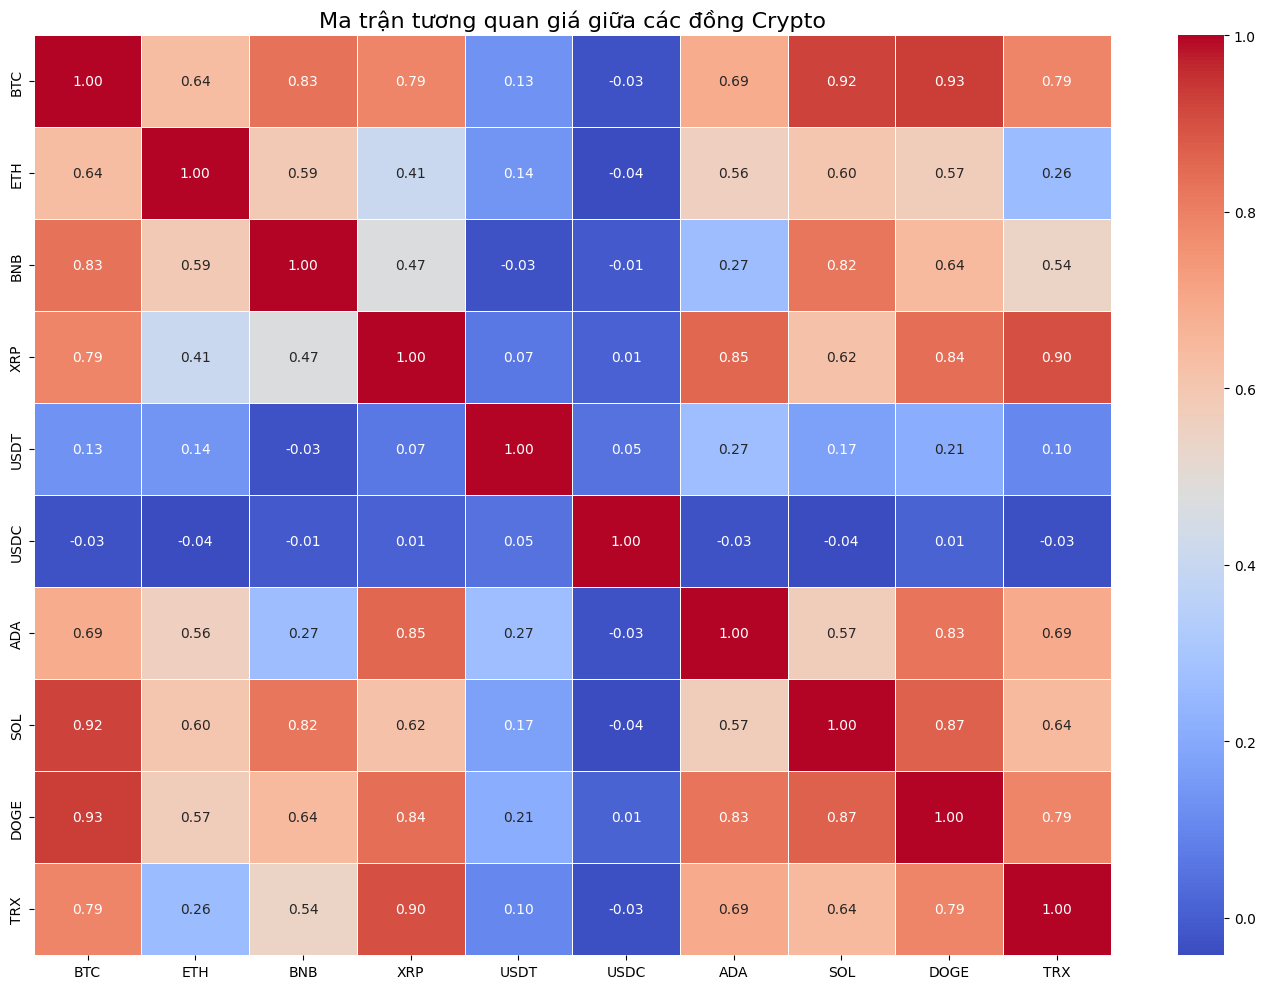

In [ ]:
plt.figure(figsize=(14, 10))

# --- MA TRẬN TƯƠNG QUAN ---
correlation_matrix = combined_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title('Ma trận tương quan giá giữa các đồng Crypto', fontsize=16)
plt.tight_layout()
plt.show()


# Phân tích dưới góc độ đầu tư tài chính

Phần 1: Phân tích lợi suất

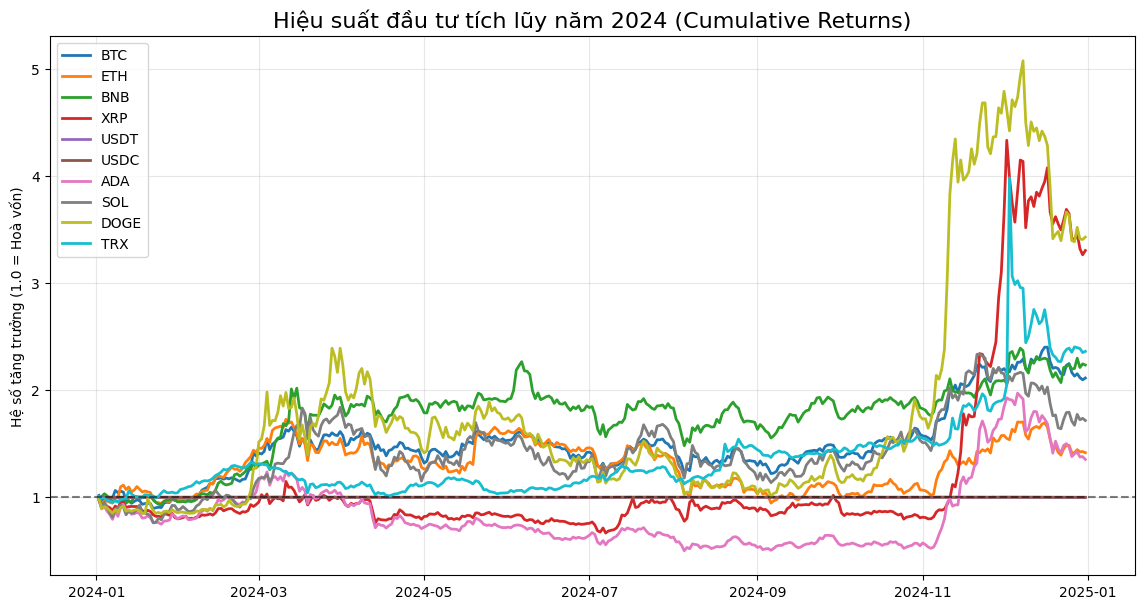

In [ ]:
# Tính toán lợi suất tích lũy: (1 + r1) * (1 + r2) * ... - 1
cumulative_returns = (1 + returns_df).cumprod()

plt.figure(figsize=(14, 7))

# Chọn một vài đồng đại diện để biểu đồ không bị rối
selected_coins = ['BTC', 'ETH', 'BNB', 'XRP', 'USDT', 'USDC','ADA', 'SOL', 'DOGE', 'TRX']

for col in selected_coins:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col, linewidth=2)

plt.title('Hiệu suất đầu tư tích lũy năm 2024 (Cumulative Returns)', fontsize=16)
plt.ylabel('Hệ số tăng trưởng (1.0 = Hoà vốn)')
plt.axhline(1.0, color='black', linestyle='--', alpha=0.5) # Đường hoà vốn
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Nhận xét:

*   Ngôi sao sáng nhất (Top Performer): DOGE (đường màu vàng rêu) là quán quân tuyệt đối với mức tăng trưởng bùng nổ vào cuối năm, đạt đỉnh hơn 5.0x (tức lãi 400%). Điều này cho thấy sức mạnh của dòng tiền đầu cơ vào Memecoin.
*   Cú "quay xe" ngoạn mục: XRP (đường màu đỏ) và ADA (màu hồng) có hiệu suất rất tệ (thậm chí lỗ vốn - dưới mức 1.0) trong phần lớn thời gian giữa năm (tháng 4 - tháng 10). Tuy nhiên, cả hai đã dựng cột thẳng đứng vào tháng 11, với XRP vọt lên mức ~4.0x.
*   Nhóm tăng trưởng bền vững (Safe Haven): BTC, BNB, SOL giữ xu hướng tăng đều đặn hơn và ít biến động cực đoan như nhóm trên. Kết thúc năm, nhóm này đều mang lại lợi nhuận tốt (~2.0x - 2.5x).
*   Mục danh sáchNhóm ổn định (Stablecoins): USDT và USDC đi ngang ở mức 1.0 đúng như bản chất neo giá.

=> Sự trở lại của khẩu vị rủi ro cao (High Risk Appetite): Việc DOGE vượt mặt Bitcoin và Ethereum về hiệu suất cho thấy dòng tiền bán lẻ (Retail) đã quay lại mạnh mẽ vào cuối năm, ưu tiên các tài sản có tính biến động cao và tính giải trí (Memecoin) hơn là công nghệ nền tảng. Cụ thể:


*   Quý 1: Tăng trưởng nhẹ nhờ hiệu ứng ETF Bitcoin Spot.
*   Quý 2 & 3: Thị trường đi vào giai đoạn tích lũy (Sideway) và điều chỉnh kéo dài (Post-Halving). Nhà đầu tư nắm giữ Altcoins giai đoạn này chịu áp lực tâm lý lớn khi tài khoản không tăng hoặc giảm.
*   Quý 4: Cú hích cực mạnh vào tháng 11 (trùng khớp với thời điểm bầu cử Mỹ và các tin tức vĩ mô tích cực) đã kích hoạt một đợt "Up-only" điên rồ.







/tmp/ipython-input-870540027.py:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(data=daily_returns[sorted_index], palette=my_palette, showmeans=True,


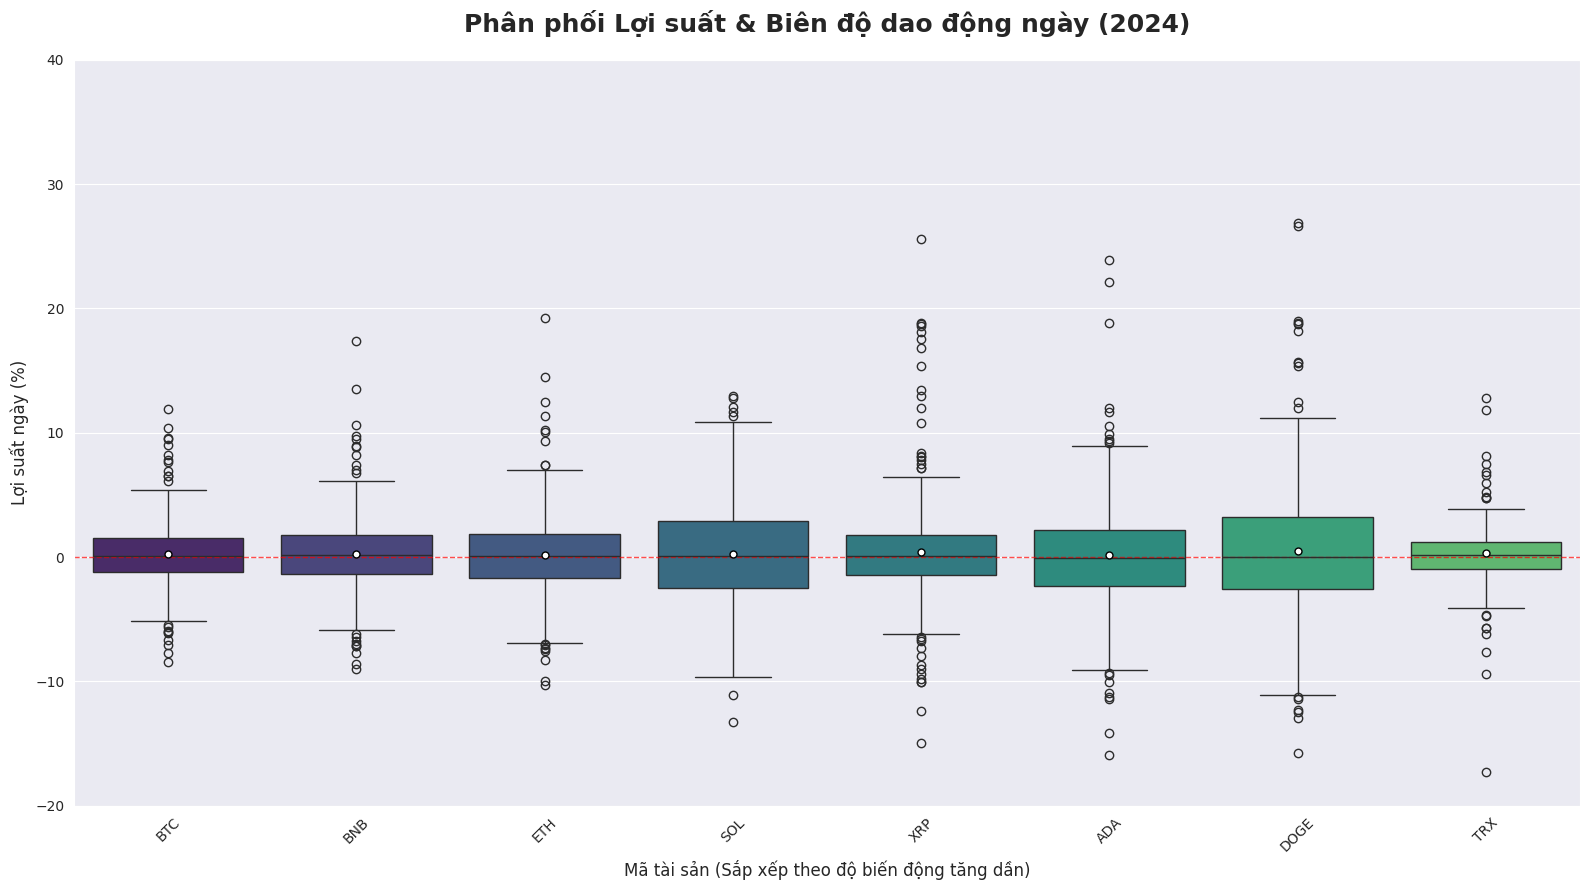

In [ ]:
# Tính % thay đổi hàng ngày
daily_returns = combined_df.pct_change().dropna() * 100

plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")
my_palette = sns.color_palette("viridis", n_colors=len(daily_returns.columns))

# ---  VẼ BIỂU ĐỒ BOX PLOT ---
# Sắp xếp theo độ biến động
sorted_index = daily_returns.drop(columns=['USDC', 'USDT'], errors='ignore').std().sort_values().index # USDC, USDT là stable coin
sns.boxplot(data=daily_returns[sorted_index], palette=my_palette, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"})

plt.title('Phân phối Lợi suất & Biên độ dao động ngày (2024)', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Lợi suất ngày (%)', fontsize=12)
plt.xlabel('Mã tài sản (Sắp xếp theo độ biến động tăng dần)', fontsize=12)

# GIỚI HẠN TRỤC Y TỪ -20 ĐẾN 40
plt.ylim(-20, 40)

# Thêm đường tham chiếu 0%
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dựa trên biểu đồ Phân phối (Box Plot):

Nhóm Ổn định (Core Holdings): BTC, ETH và BNB thể hiện biên độ dao động nội tại (Interquartile Range - IQR) hẹp và nén chặt. Điều này phản ánh sự trưởng thành về thanh khoản và sự tham gia của dòng tiền tổ chức, giảm thiểu các biến động phi hệ thống (Unsystematic Risk).

Nhóm Rủi ro đuôi (Fat-tail Risk): DOGE và SOL thể hiện vùng biến động giá (Whiskers) mở rộng về cả hai phía. Đặc biệt, DOGE sở hữu độ lệch chuẩn cao nhất danh mục, xác nhận tính chất "High Risk - High Return" điển hình của dòng tiền bán lẻ (Retail Flow).

Hiện tượng Bất cân xứng (Asymmetry): Các tài sản như XRP và ADA xuất hiện mật độ cao các giá trị ngoại lai dương (Positive Outliers). Điều này cho thấy mặc dù biến động nền thấp trong phần lớn thời gian (Low volatility regime), chúng có xu hướng bùng nổ giá cực đoan (Price shocks) khi có chất xúc tác.

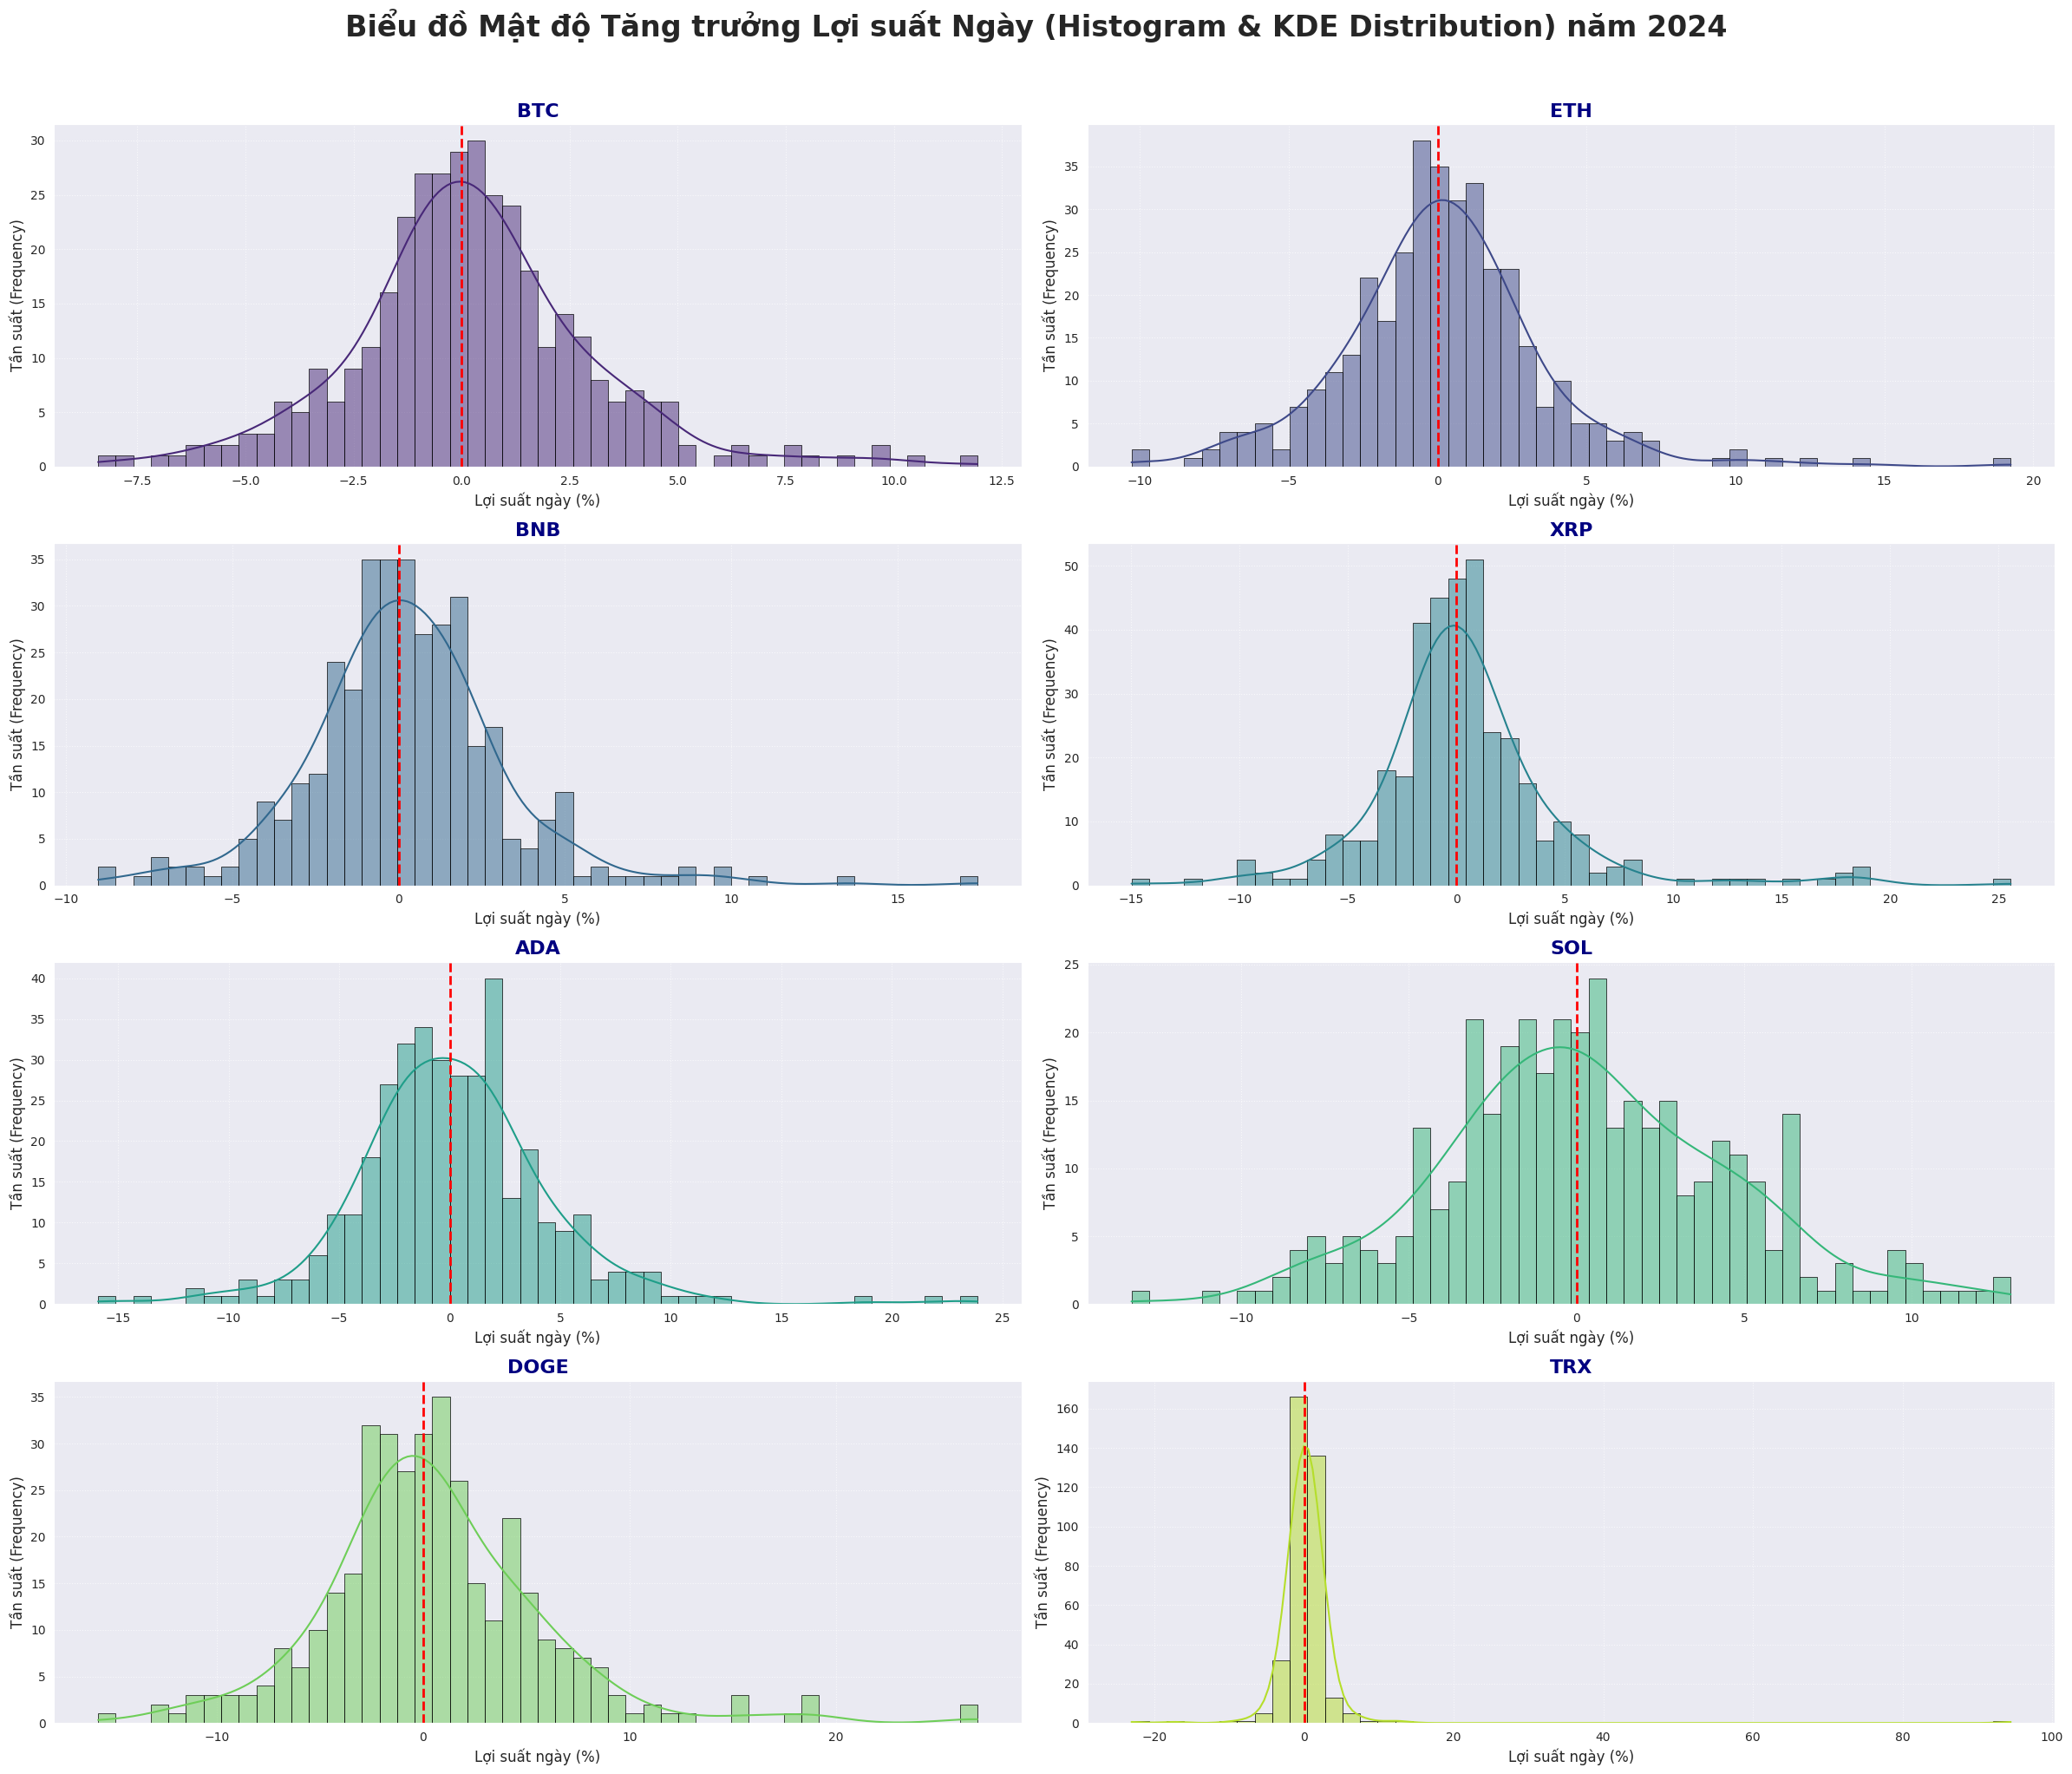

In [ ]:
coins_to_plot = ['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'SOL', 'DOGE', 'TRX']
plot_data = daily_returns[coins_to_plot]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(24, 20))
fig.suptitle('Biểu đồ Mật độ Tăng trưởng Lợi suất Ngày (Histogram & KDE Distribution) năm 2024',
             fontsize=24, fontweight='bold', y=1.02) # Tiêu đề tổng

# Làm phẳng mảng axes 2D thành 1D để dễ dùng vòng lặp
axes_flat = axes.flatten()

for i, coin_name in enumerate(coins_to_plot):
    ax = axes_flat[i] # Chọn vị trí biểu đồ con hiện tại

    # Vẽ Histogram kết hợp đường KDE (Kernel Density Estimate)
    # bins=50: Chia dữ liệu thành 50 cột nhỏ để nhìn rõ độ mịn
    sns.histplot(plot_data[coin_name], bins=50, kde=True, ax=ax,
                 color=sns.color_palette("viridis", n_colors=8)[i], edgecolor='black', linewidth=0.5)

    # Tùy chỉnh từng biểu đồ con
    ax.set_title(coin_name, fontsize=16, fontweight='bold', color='navy')
    ax.set_xlabel('Lợi suất ngày (%)', fontsize=12)
    ax.set_ylabel('Tần suất (Frequency)', fontsize=12)

    # Thêm đường kẻ đỏ tại mức 0% (Hòa vốn) để làm mốc
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Mốc 0%')
    ax.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout() # Tự động căn chỉnh khoảng cách giữa các biểu đồ cho đẹp
plt.show()

Biểu đồ Mật độ (Histogram/KDE) cung cấp cái nhìn sâu sắc về hành vi giá:

Độ nhọn (Kurtosis): TRX và các coin Top-tier (BTC, ETH) thể hiện phân phối Leptokurtic (đỉnh nhọn), cho thấy giá có xu hướng dao động quanh mức trung bình (Mean) và có tính ổn định cao.

Độ lệch (Skewness): DOGE thể hiện phân phối Platykurtic (đỉnh thấp, bè ngang) với đuôi phải dày (Positive Skew). Điều này hàm ý rằng xác suất xảy ra các phiên tăng giá đột biến là cao hơn đáng kể so với phân phối chuẩn, hấp dẫn các chiến lược giao dịch theo đà (Momentum Trading).

2. PHÂN TÍCH RỦI RO ĐỘNG

/tmp/ipython-input-1292184570.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
/tmp/ipython-input-1292184570.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
/tmp/ipython-input-1292184570.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
/tmp/ipython-input-1292184570.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
/tmp/ipython-input-1292184570.py:38: UserWarning: set_ticklabels() should only be used with a fixed numb

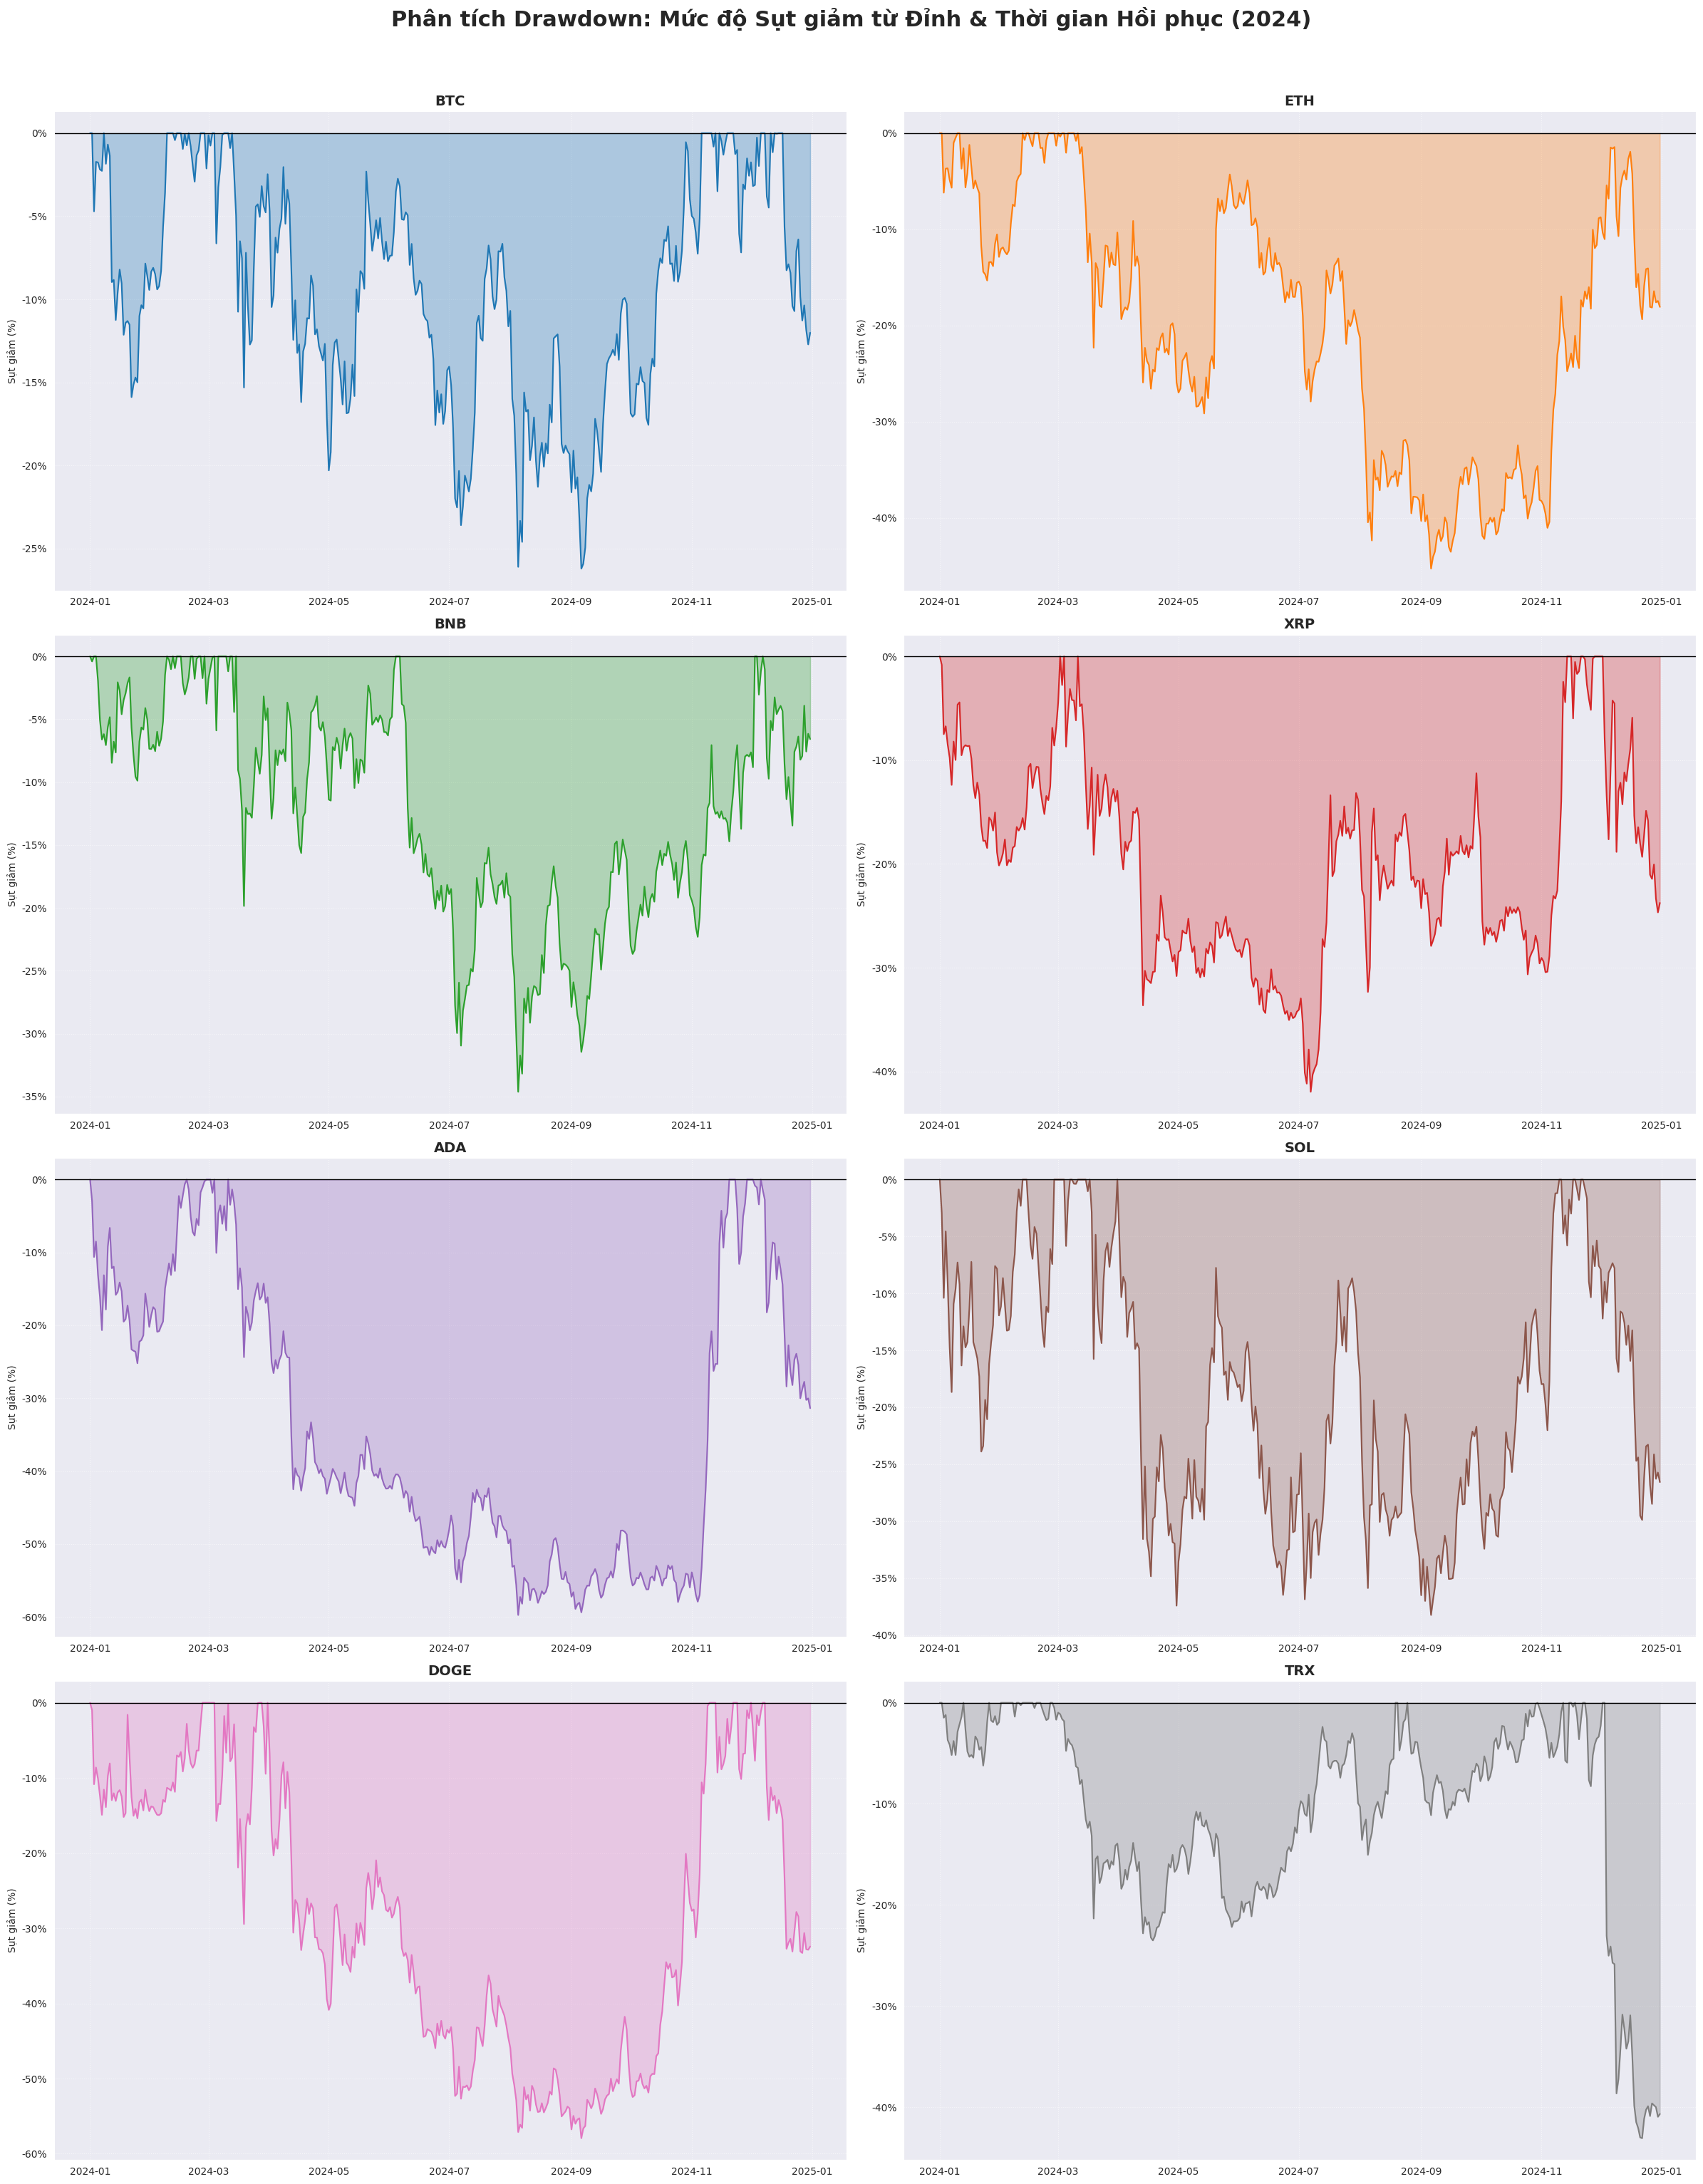

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# (Giả sử combined_df đã được tạo từ các bước trước)
risk_coins = ['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'SOL', 'DOGE', 'TRX']
data_risk = combined_df[risk_coins].copy()

# Rolling Max: Giá cao nhất tính từ đầu năm đến thời điểm t
rolling_max = data_risk.cummax()

# Drawdown formula: (Giá hiện tại - Đỉnh cao nhất) / Đỉnh cao nhất
drawdown = (data_risk - rolling_max) / rolling_max
drawdown = drawdown * 100 # Chuyển sang %

fig1, axes1 = plt.subplots(nrows=4, ncols=2, figsize=(24, 30))
fig1.suptitle('Phân tích Drawdown: Mức độ Sụt giảm từ Đỉnh & Thời gian Hồi phục (2024)',
              fontsize=22, fontweight='bold', y=1.02)

axes_flat1 = axes1.flatten()
colors = sns.color_palette("tab10", n_colors=8)

for i, coin in enumerate(risk_coins):
    ax = axes_flat1[i]
    # Vẽ đường line
    ax.plot(drawdown.index, drawdown[coin], color=colors[i], linewidth=1.5)
    # Tô màu vùng sụt giảm (Underwater)
    ax.fill_between(drawdown.index, drawdown[coin], 0, color=colors[i], alpha=0.3)

    ax.set_title(coin, fontsize=14, fontweight='bold')
    ax.set_ylabel('Sụt giảm (%)', fontsize=10)
    ax.axhline(0, color='black', linewidth=1) # Đường mặt nước
    ax.grid(True, linestyle=':', alpha=0.6)

    # Format trục Y để hiển thị %
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

plt.tight_layout()
plt.show()

Ý nghĩa của biểu đồ: "Nếu bỏ 1 đồng vào đầu năm, cuối năm cầm về bao nhiêu?". Nó cho thấy xu hướng dòng tiền.


Ví dụ cách tính:



<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
    <tr>
        <th>Thời gian</th>
        <th>Giá BTC</th>
        <th>Đỉnh cao nhất (rolling_max)</th>
        <th>Lợi nhuận (so với T1)</th>
        <th>Drawdown</th>
    </tr>
    <tr>
        <td>Tháng 1</td>
        <td>$40,000</td>
        <td>$40,000</td>
        <td>0%</td>
        <td>0% (Đang ở đỉnh)</td>
    </tr>
    <tr>
        <td>Tháng 3</td>
        <td>$70,000</td>
        <td>$70,000</td>
        <td>+75% (Tăng mạnh)</td>
        <td>0% (Đang ở đỉnh mới)</td>
    </tr>
    <tr>
        <td>Tháng 6</td>
        <td>$60,000</td>
        <td>$70,000</td>
        <td>+50% (Vẫn lãi lớn)</td>
        <td>-14.2% (Sụt giảm từ đỉnh)</td>
    </tr>
    <tr>
        <td>Tháng 9</td>
        <td>$65,000</td>
        <td>$70,000</td>
        <td>+62.5% (Lãi rất lớn)</td>
        <td>-7.1% (Vẫn âm vì chưa phá đỉnh cũ)</td>
    </tr>
</table>


**BTC:**
- Bitcoin có mức sụt giảm nông nhất (thường chỉ -15% đến -20% và tối đa khoảng -25%). Các vùng giá trị 0% xuất hiện dày đặc. Điều này nghĩa là BTC liên tục phá đỉnh hoặc quay lại đỉnh cũ rất nhanh.
- Đây là tài sản giữ giá trị tốt nhất, rủi ro kẹt vốn thấp nhất.

**SOL & ETH:**
- SOL (nâu): Rất dữ dội. Nó sụt sâu (-30% đến -35%) nhưng các đường nhọn đi lên rất dốc.
- ETH (cam): Tương đồng với BTC nhưng biên độ dao động rộng hơn (Drawdown sâu hơn, khoảng -30% đến -40%).
- Phù hợp cho trader thích "bắt đáy" vì thời gian chờ về bờ nhanh hơn các altcoin khác.

**ADA & XRP: **
- ADA & XRP: Hãy nhìn vùng diện tích màu chiếm đa số biểu đồ. Sau khi đạt đỉnh đầu năm, chúng giảm một mạch và nằm dưới "đáy biển" trong 6-8 tháng liên tục (từ tháng 4 đến tháng 11).
- Mức giảm: Rất sâu, có lúc ADA giảm tới -60%, XRP giảm -40%. Đây là các tài sản gây ức chế tâm lý nhất. Nếu bạn lỡ mua ở đỉnh đầu năm, bạn phải chờ gần như cả năm mới thấy giá hồi phục. Khả năng hồi phục kém hơn hẳn SOL.

**DOGE:**
- DOGE có một cú giảm cực lớn ở giữa năm (giảm >50%). Tuy nhiên, vào cuối năm (Tháng 11-12), nó dựng đứng một cột hồi phục về sát mức 0%.
- Phản ánh đặc trưng của Meme coin là Rủi ro cực lớn trong dài hạn nhưng lợi nhuận bùng nổ chỉ diễn ra trong thời gian rất ngắn.

**TRX:**
- TRX (xám) rất lạ. Suốt cả năm nó giữ giá cực tốt (ít biến động, drawdown thấp chỉ -10% đến -20%). Nhưng nhìn vào góc phải cuối cùng: Một cú sập thẳng đứng xuống -40% vào cuối năm.
- Đây là tín hiệu cảnh báo về một sự kiện thiên nga đen hoặc một tin tức tiêu cực cụ thể ập đến với dự án này vào cuối chu kỳ, phá vỡ cấu trúc ổn định trước đó.

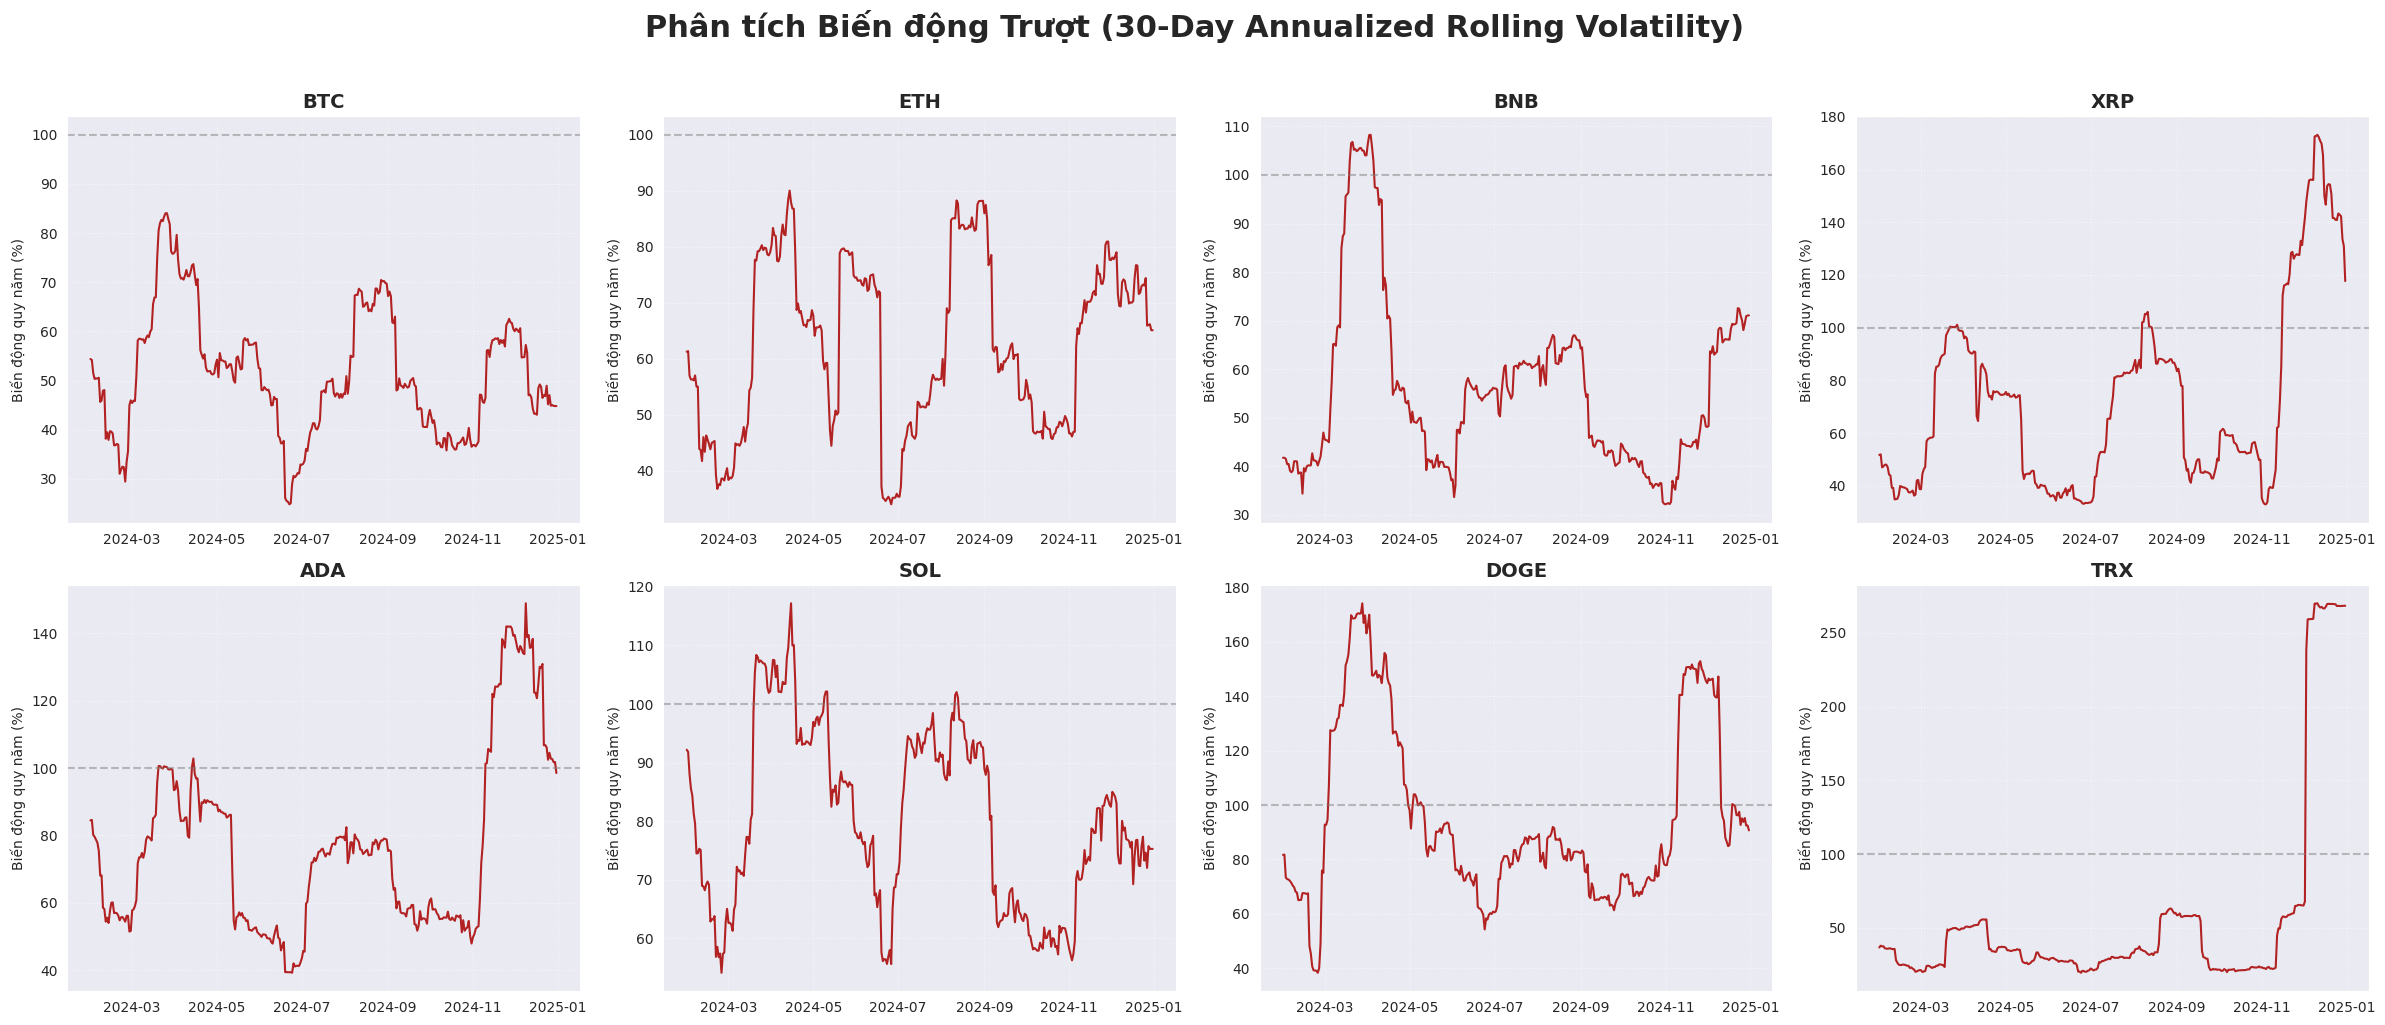

In [ ]:
log_returns = np.log(data_risk / data_risk.shift(1)) # Tính log returns để chính xác hơn cho chuỗi thời gian

rolling_vol = log_returns.rolling(window=30).std() * np.sqrt(365) * 100 # Tính độ lệch chuẩn 30 ngày, nhân với căn bậc 2 của 365 để Annualize (chuẩn hóa theo năm)

fig2, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))
fig2.suptitle('Phân tích Biến động Trượt (30-Day Annualized Rolling Volatility)',
              fontsize=22, fontweight='bold', y=1.02)

axes_flat2 = axes2.flatten()

for i, coin in enumerate(risk_coins):
    ax = axes_flat2[i]
    # Vẽ đường biến động
    ax.plot(rolling_vol.index, rolling_vol[coin], color='firebrick', linewidth=1.5)

    ax.set_title(coin, fontsize=14, fontweight='bold')
    ax.set_ylabel('Biến động quy năm (%)', fontsize=10)

    # Tô màu nền cảnh báo khi biến động quá cao (ví dụ > 100%)
    ax.axhline(100, color='gray', linestyle='--', alpha=0.5, label='High Risk Zone')

    ax.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

** GIẢI THÍCH**

Tại sao lại sử dụng log?

Trong tài chính định lượng, thay vì dùng % thay đổi thông thường, người ta dùng Logarit tự nhiên ($ln$). Lý do là để tính toán cộng dồn chính xác hơn và làm mượt dữ liệu (chuẩn hóa phân phối chuẩn) tốt hơn cho các mô hình thống kê.


Ý nghĩa của tham số Rolling window (window=30)?



Cơ chế: Máy tính sẽ tạo một "khung cửa sổ" rộng 30 ngày.

- Ngày 30: Tính độ lệch chuẩn (Standard Deviation) từ ngày 1 đến ngày 30.

- Ngày 31: Tính từ ngày 2 đến ngày 31.

- ... cứ thế trượt đi.

Ý nghĩa: Nó trả lời câu hỏi: "Trong 1 tháng qua, giá cả giật lên giật xuống mạnh đến mức nào?". Dùng 30 ngày là để lọc nhiễu, giúp nhìn thấy xu hướng ngắn hạn (short-term trend) của rủi ro.

Tại sao nhân căn bậc 2 của 365?

- Đây là quy tắc chuẩn trong tài chính. Vì độ lệch chuẩn tính theo ngày, muốn so sánh với lãi suất ngân hàng hay các chỉ số vĩ mô (thường tính theo năm - per annum), ta phải nhân với sqrt{365}.

**NHẬN XÉT:**
1. Nhóm "Blue-chip" An toàn (BTC, ETH)
- Đây là hai đồng duy nhất duy trì mức biến động dưới ngưỡng nguy hiểm 100% trong suốt cả năm (đỉnh điểm chỉ khoảng 85-90%).

- Ý nghĩa: Chúng đóng vai trò là "mỏ neo" của thị trường. Dù thị trường có bão, biên độ dao động của chúng vẫn nằm trong tầm kiểm soát, ít có xác suất "cháy tài khoản" bất ngờ so với các altcoin khác.

2. Nhóm "Ngủ đông & Bùng nổ" (XRP, ADA)
- Hai đồng này có chung một mẫu hình: Đi ngang khá lâu (biến động thấp ~40%) rồi đột ngột dựng đứng vào cuối năm.

- Đặc biệt là XRP: Cột biến động cuối năm vọt lên tới 170%.

- Ý nghĩa: Rủi ro của nhóm này mang tính "sự kiện" (event-driven). Khi dòng tiền đổ vào hoặc có tin tức pháp lý, chúng biến động cực mạnh, tạo cơ hội lớn nhưng cũng dễ khiến người chơi "đu đỉnh" nếu vào chậm.

3. Nhóm "Luôn ở trạng thái kích thích" (SOL, DOGE)
- SOL: Mức "nền" biến động luôn cao (hiếm khi dưới 60%) và thường xuyên chạm mốc 100%. Đây là sân chơi của trader active.

- DOGE: Hai đỉnh nhọn cực lớn đầu năm và cuối năm (>150%). Đây là đặc trưng của Meme coin: Biến động theo chu kỳ "hype" (tin tức/người nổi tiếng), không theo quy luật kỹ thuật thông thường.

4. Nhóm "Bất thường & Cá biệt" (TRX, BNB)
- TRX (Cực kỳ bất thường): Hãy nhìn biểu đồ này kỹ nhất. Suốt 3/4 năm nó đi phẳng lì như stablecoin (biến động ~20%), rồi đột ngột dựng một cột thẳng đứng lên >250% vào cuối năm. Đây là dấu hiệu của sự thao túng giá hoặc một sự kiện thiên nga đen cụ thể.

- BNB: Ngược lại với số đông, nó biến động mạnh đầu năm rồi lại trở nên "ngoan ngoãn" và ổn định dần về cuối năm.


-----------------------------------------------------------------------

3. PHÂN TÍCH TƯƠNG QUAN & CẤU TRÚC THỊ TRƯỜNG

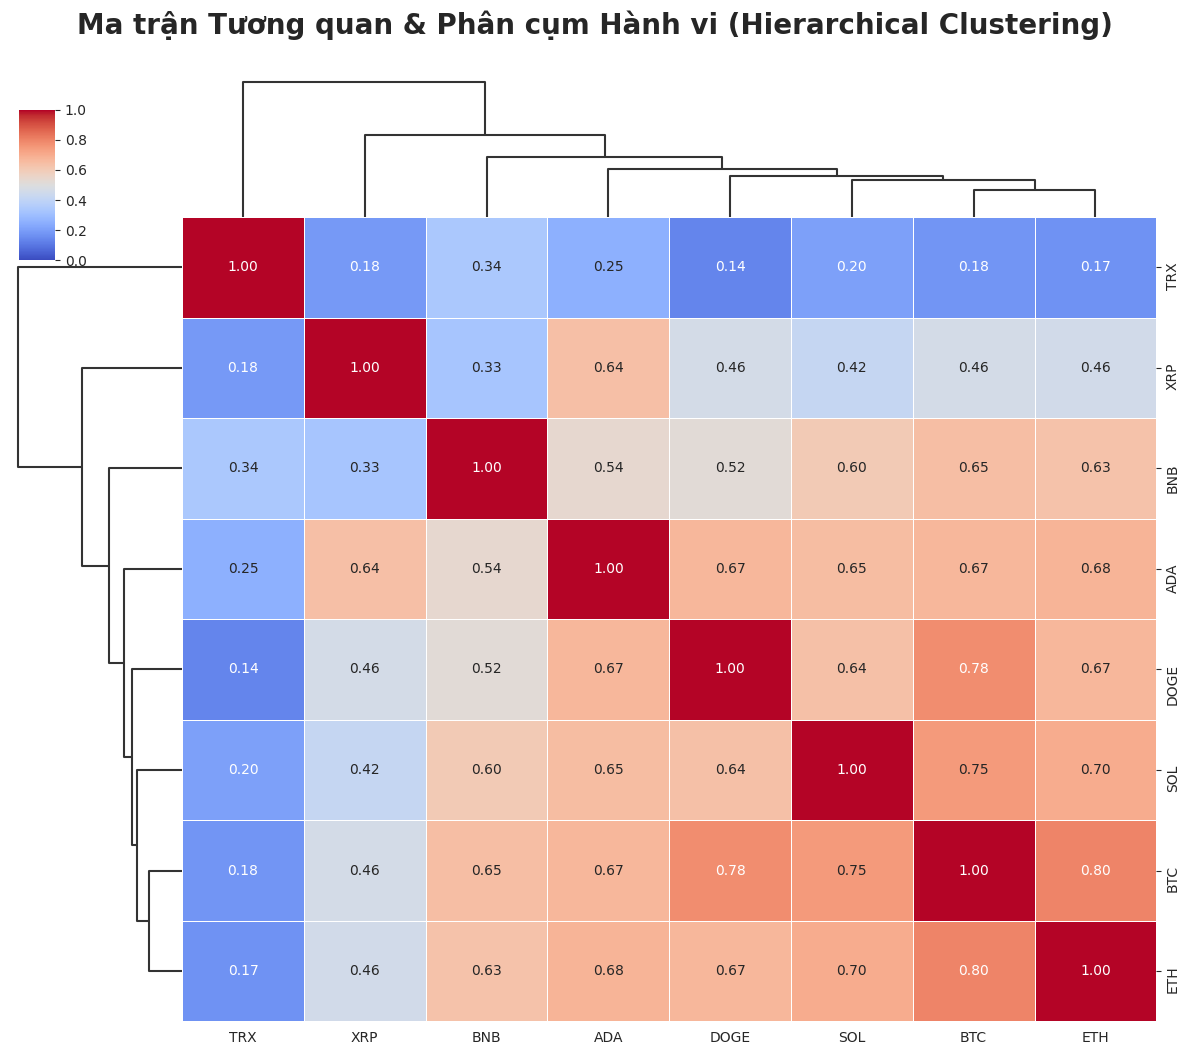

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loại bỏ Stablecoin (USDT, USDC) vì không có ý nghĩa tương quan lợi suất
analysis_coins = ['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'SOL', 'DOGE', 'TRX']
# Sử dụng log_returns đã tính ở phần trước (nếu chưa có thì tính lại từ combined_df)
log_returns = np.log(combined_df[analysis_coins] / combined_df[analysis_coins].shift(1)).dropna()

# Tính ma trận tương quan (Pearson Correlation)
corr_matrix = log_returns.corr()

# --- VẼ BIỂU ĐỒ CLUSTERMAP ---
g = sns.clustermap(corr_matrix,
                   annot=True,       # Hiển thị số
                   fmt=".2f",        # Làm tròn 2 chữ số
                   cmap="coolwarm",  # Màu nóng lạnh (Đỏ = Tương quan dương cao, Xanh = Âm)
                   vmin=0, vmax=1,   # Crypto hiếm khi tương quan âm, nên set từ 0 đến 1
                   figsize=(12, 10),
                   dendrogram_ratio=(.15, .15), # Tỷ lệ cây phân cấp
                   cbar_pos=(0.02, 0.8, 0.03, 0.15), # Vị trí thanh màu
                   linewidths=0.5,   # Đường kẻ giữa các ô
                   tree_kws={'linewidths': 1.5}) # Độ đậm cây phân cấp

g.fig.suptitle('Ma trận Tương quan & Phân cụm Hành vi (Hierarchical Clustering)',
               fontsize=20, fontweight='bold', y=1.05)

plt.show()

- mã TRX là một mã the lone wolf:

Hãy nhìn hàng trên cùng (TRX). Nó được tô màu xanh dương đậm nhất. Hệ số tương quan của nó với BTC chỉ là 0.18, với ETH là 0.17. Nhánh cây (Dendrogram) bên trái cũng tách biệt TRX ra khỏi tất cả các coin còn lại ngay từ gốc.

=> Nếu bạn cần một tài sản để chống lại rủi ro hệ thống khi thị trường sập, TRX là ứng viên tốt về mặt toán học (nhưng hãy cẩn thận với rủi ro nội tại của nó).

- Sự đồng pha cực lớn giữa BTC, ETH và DOGE:

Với độ tương quan cao, Danh mục đầu tư chứa BTC + ETH + DOGE thực chất là bạn đang "bỏ trứng vào cùng một giỏ" về mặt biến động giá.

**Dựa trên biểu đồ này, nếu bạn muốn Tối ưu hóa đa dạng hóa:**

- Đừng chỉ mua: BTC + ETH + SOL (Vì hệ số tương quan > 0.7 hết, thị trường sập là sập cả đám).

- Nên kết hợp: Một coin trong nhóm Core (ví dụ BTC) + Một chút TRX (để cân bằng khi BTC giảm) + Một chút XRP (để bắt sóng tin tức riêng).


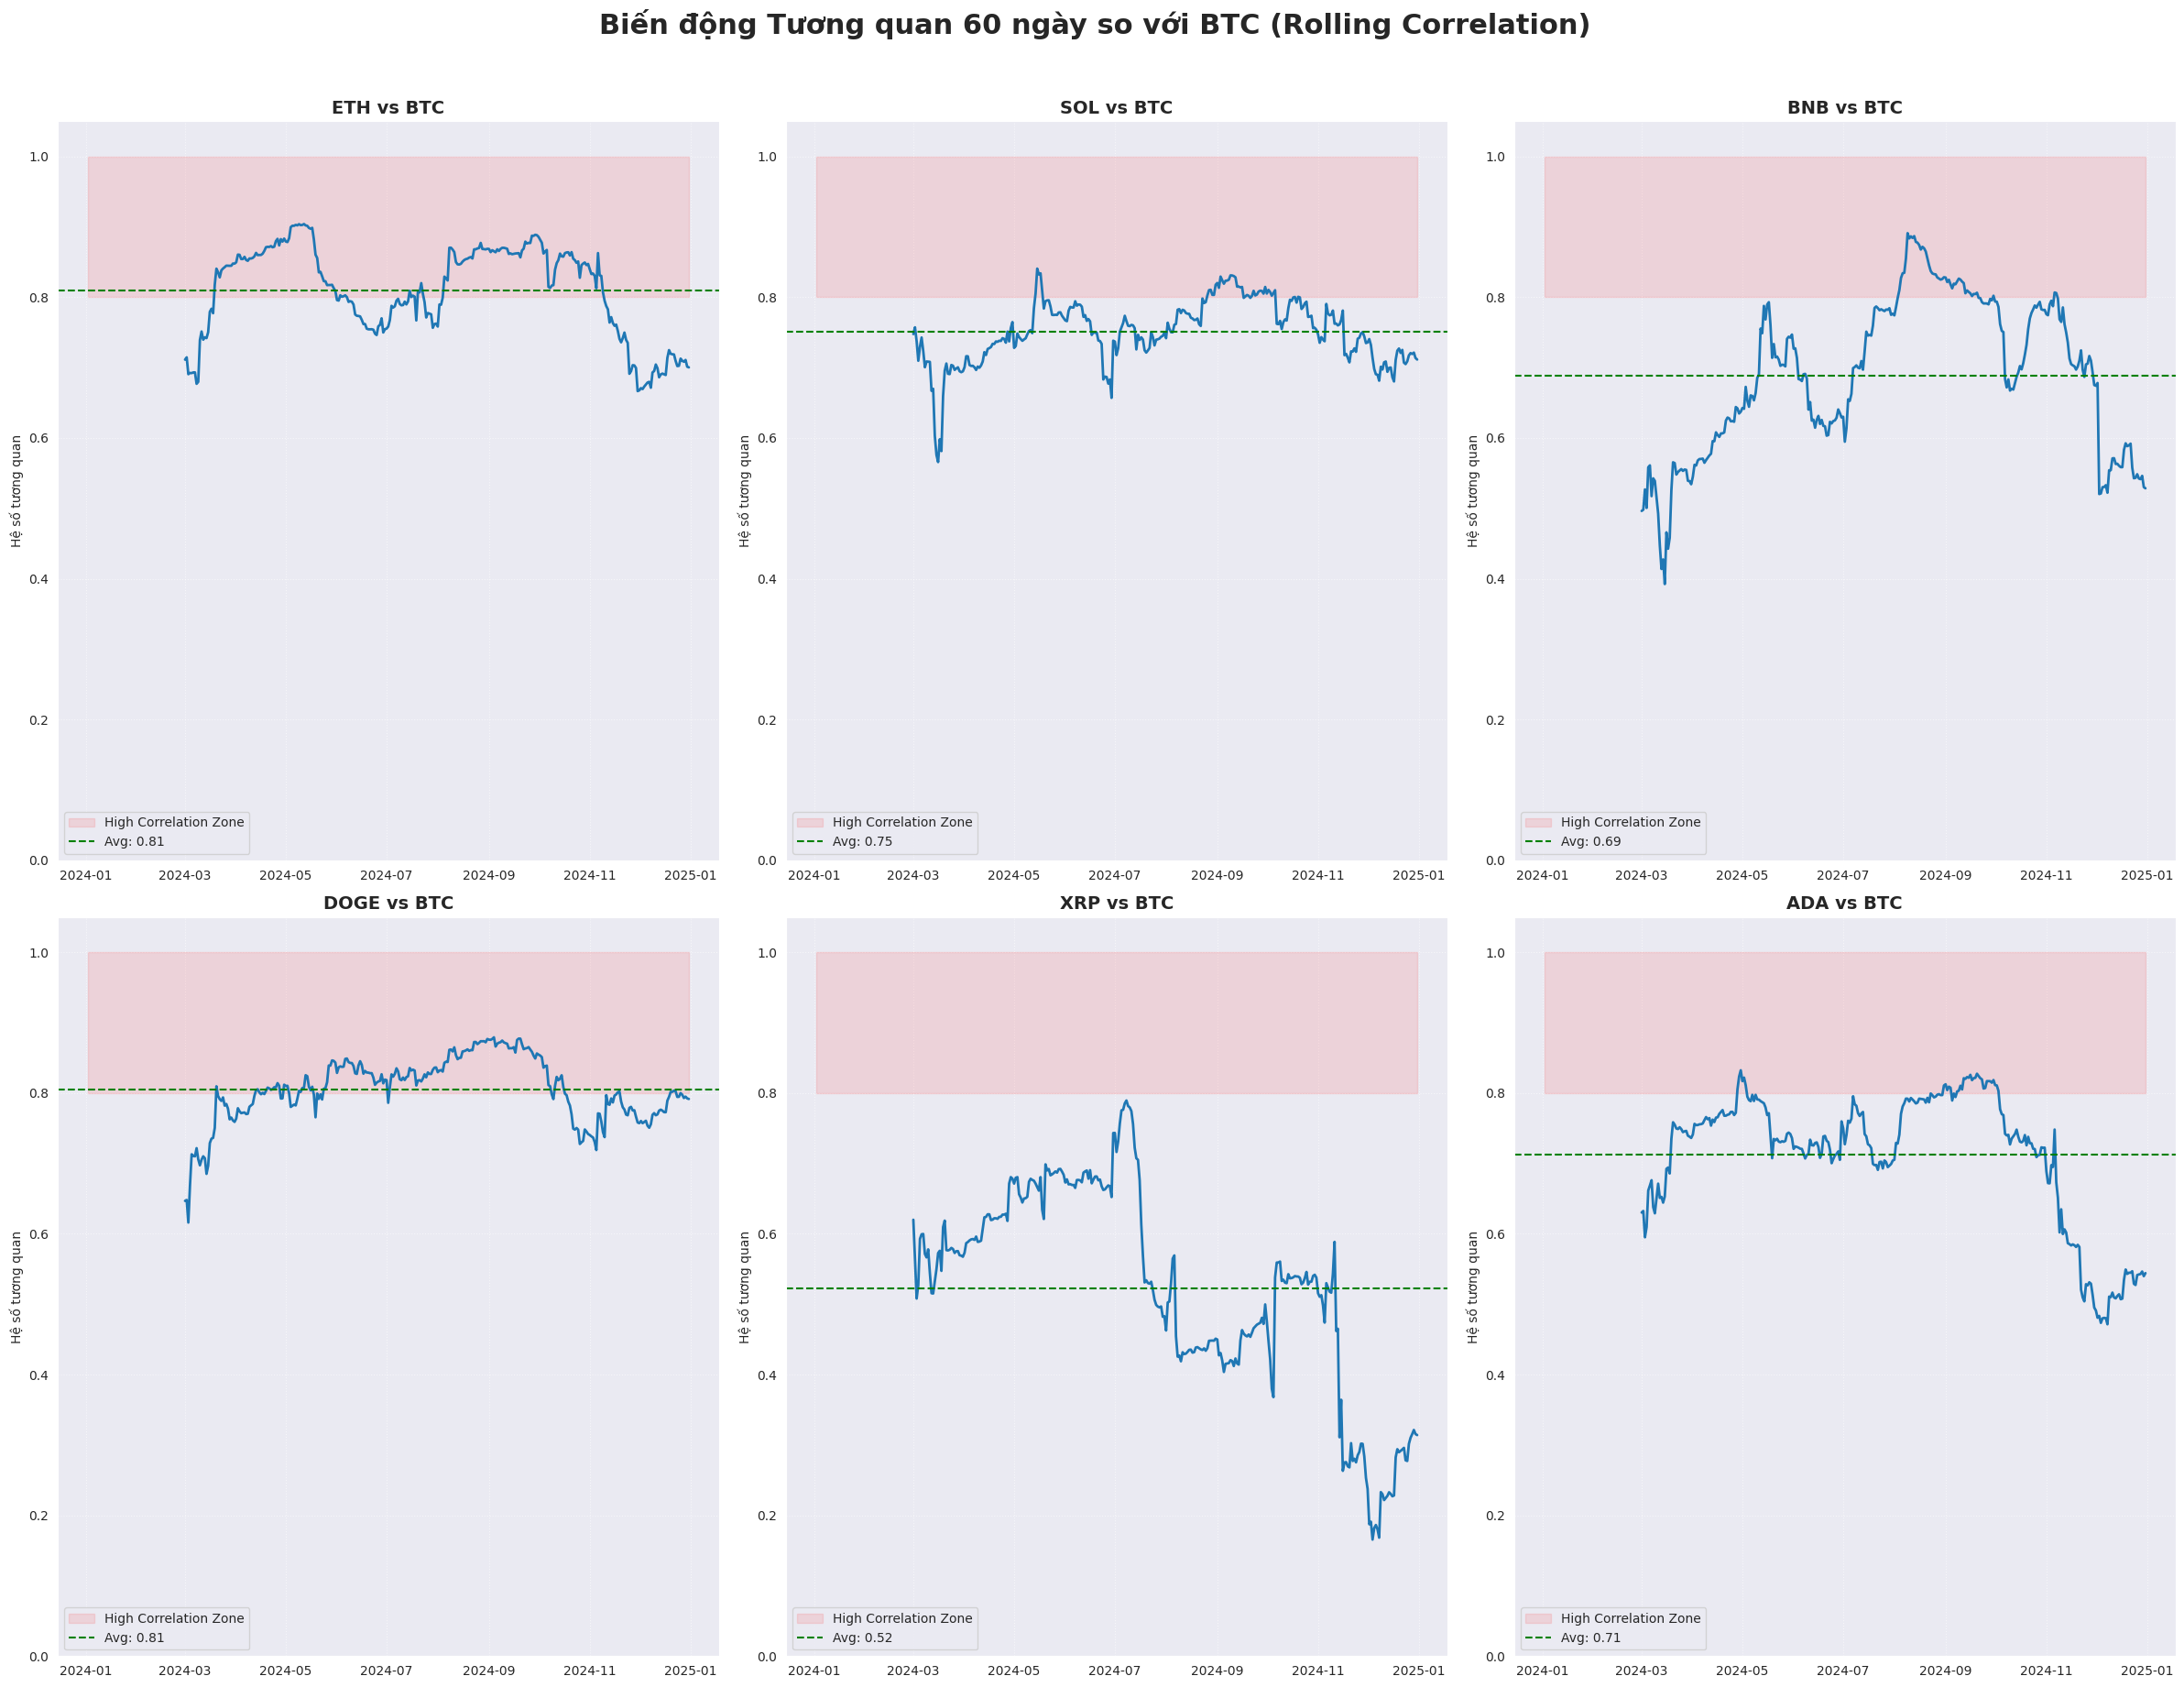

In [ ]:
window_size = 60 # Cửa sổ 60 ngày (khoảng 2 tháng) để nhìn xu hướng trung hạn
benchmark = 'BTC'
target_coins = ['ETH', 'SOL', 'BNB', 'DOGE', 'XRP', 'ADA'] # Chọn các coin chính để so sánh

# Tạo khung lưới
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 18))
fig.suptitle(f'Biến động Tương quan 60 ngày so với {benchmark} (Rolling Correlation)',
             fontsize=22, fontweight='bold', y=1.02)
axes_flat = axes.flatten()

for i, coin in enumerate(target_coins):
    ax = axes_flat[i]

    # Tính tương quan trượt giữa Coin đó và BTC
    rolling_corr = log_returns[coin].rolling(window=window_size).corr(log_returns[benchmark])

    # Vẽ đường tương quan
    ax.plot(rolling_corr.index, rolling_corr, color='tab:blue', linewidth=2)

    # Tô màu cảnh báo vùng tương quan cực cao (>0.8)
    ax.fill_between(rolling_corr.index, 0.8, 1.0, color='red', alpha=0.1, label='High Correlation Zone')

    ax.set_title(f'{coin} vs {benchmark}', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1.05) # Giới hạn trục Y
    ax.set_ylabel('Hệ số tương quan', fontsize=10)
    ax.grid(True, linestyle=':', alpha=0.6)

    # Vẽ đường trung bình tương quan cả năm
    mean_corr = rolling_corr.mean()
    ax.axhline(mean_corr, color='green', linestyle='--', label=f'Avg: {mean_corr:.2f}')
    ax.legend(loc='lower left')

plt.tight_layout()
plt.show()

1. Ý nghĩa của cửa sổ 60 ngày (The 60-Day Window)

- Nó không phản ánh biến động từng ngày (nhiễu).

- Nó cho thấy xu hướng trung hạn (Medium-term trend). Khi đường này đi lên, nghĩa là trong 2 tháng qua, coin đó và BTC đang "cùng chung nhịp đập".

2. Insight chi tiết từng nhóm

Nhóm 1: Những cái bóng của Bitcoin (ETH & DOGE)
- ETH (Avg 0.81): Luôn nằm trong hoặc sát vùng báo động đỏ (High Correlation Zone). ETH gần như không có lối đi riêng. Khi BTC tăng, ETH tăng; BTC giảm, ETH giảm.
- Kết luận: Nắm giữ BTC và ETH cùng lúc không giúp đa dạng hóa danh mục nhiều về mặt biến động giá.
- DOGE (Avg 0.81): Đây là điểm thú vị nhất. Thông thường người ta nghĩ Meme coin sẽ chạy loạn xạ. Nhưng dữ liệu chỉ ra rằng DOGE hiện tại hành xử "trưởng thành" y hệt một Major Coin. Nó bám sát BTC còn chặt hơn cả SOL hay BNB.
- Kết luận: DOGE hiện tại là một "Beta asset" (tài sản chạy theo thị trường) chứ không còn là xổ số tách biệt hoàn toàn.

Nhóm 2: Sự "Tách Top" cuối năm (BNB & ADA)

- Hiện tượng: Hãy nhìn vào phần cuối biểu đồ (giai đoạn cuối 2024) của BNB và ADA. Đường màu xanh cắm đầu đi xuống.
- BNB: Rớt từ mức tương quan 0.8 xuống dưới 0.6. Điều này thường xảy ra khi Binance có tin tức riêng (ví dụ Launchpool, tin pháp lý) khiến giá BNB chạy lệch pha so với BTC.
- ADA: Cũng giảm mạnh tương quan về mức 0.5. Điều này cho thấy dòng tiền đang rời bỏ hoặc đổ vào ADA theo một câu chuyện riêng, không còn phụ thuộc hoàn toàn vào sóng BTC nữa.

Nhóm 3: Kẻ ngoại tộc (XRP)

- Quan sát: Đường tương quan của XRP cực kỳ bất ổn và thấp nhất hội (Avg 0.52). Đặc biệt vào cuối năm, nó rơi thẳng đứng xuống mức 0.2 (Gần như không liên quan).

- Insight: Đây là minh chứng rõ nhất cho tính chất "Event-Driven" (Chạy theo tin tức) của XRP. Khi nó có tin tốt (về vụ kiện tụng), nó sẽ pump một mình một ngựa bất chấp BTC đang làm gì.

- Chiến lược: XRP là công cụ tốt nhất trong danh sách này để Hedging (phòng vệ). Nếu thị trường chung sập, XRP là con có khả năng "đi ngược gió" cao nhất.

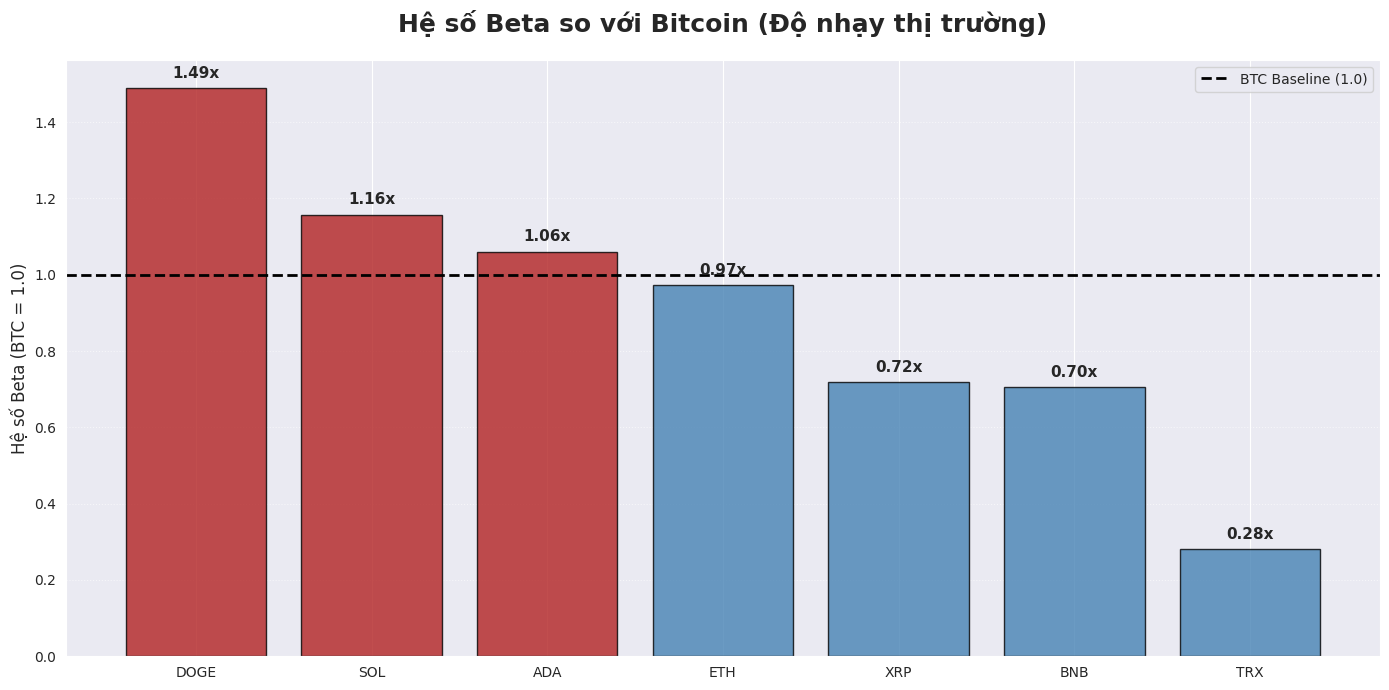

In [ ]:
# --- TÍNH HỆ SỐ BETA (BETA COEFFICIENT) ---
# Công thức: Beta = Cov(Coin, BTC) / Var(BTC)
var_btc = log_returns['BTC'].var()
betas = {}

for coin in analysis_coins:
    if coin != 'BTC':
        cov_coin_btc = log_returns[[coin, 'BTC']].cov().iloc[0, 1]
        beta = cov_coin_btc / var_btc
        betas[coin] = beta

# Chuyển thành Series để vẽ
beta_series = pd.Series(betas).sort_values(ascending=False)

# --- VẼ BIỂU ĐỒ BETA ---
plt.figure(figsize=(14, 7))
# Dùng màu gradient: Màu đỏ cho High Beta (>1), Màu xanh cho Low Beta (<1)
colors = ['firebrick' if x > 1 else 'steelblue' for x in beta_series.values]

bars = plt.bar(beta_series.index, beta_series.values, color=colors, alpha=0.8, edgecolor='black')

plt.title('Hệ số Beta so với Bitcoin (Độ nhạy thị trường)', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Hệ số Beta (BTC = 1.0)', fontsize=12)
plt.axhline(1, color='black', linestyle='--', linewidth=2, label='BTC Baseline (1.0)')

# Thêm nhãn giá trị lên đầu cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2f}x', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

Beta ($\beta$) đo lường độ nhạy (sensitivity) của một tài sản so với thị trường chung (ở đây thị trường chung được đại diện là Bitcoin).

Công thức Toán học:$$\beta_{coin} = \frac{\text{Cov}(R_{coin}, R_{BTC})}{\text{Var}(R_{BTC})}$$

$R_{coin}$, $R_{BTC}$: Lợi nhuận (return) của Coin và Bitcoin.

Cov (Covariance): Hiệp phương sai (đo lường mức độ biến thiên cùng nhau).

Var (Variance): Phương sai của Bitcoin (đo lường độ biến động của riêng Bitcoin).

Ý nghĩa Thực tiễn:
- $\beta = 1$: Coin di chuyển y hệt Bitcoin (Tăng 1% $\rightarrow$ Tăng 1%).

- $\beta > 1$ (High Beta): Coin "nhạy" hơn Bitcoin. (Ví dụ: Beta = 1.5 nghĩa là BTC tăng 1% thì Coin tăng 1.5%, nhưng nếu BTC giảm 1% thì Coin giảm tới 1.5%). $\rightarrow$ Rủi ro cao, Lợi nhuận cao.

- $\beta < 1$ (Low Beta): Coin "lì" hơn Bitcoin. Biến động ít hơn thị trường. $\rightarrow$ Phòng thủ tốt hơn.

- $\beta < 0$ (Negative Beta): Coin đi ngược chiều Bitcoin (Rất hiếm trong Crypto).

4. HIỆU SUẤT ĐIỀU CHỈNH RỦI RO

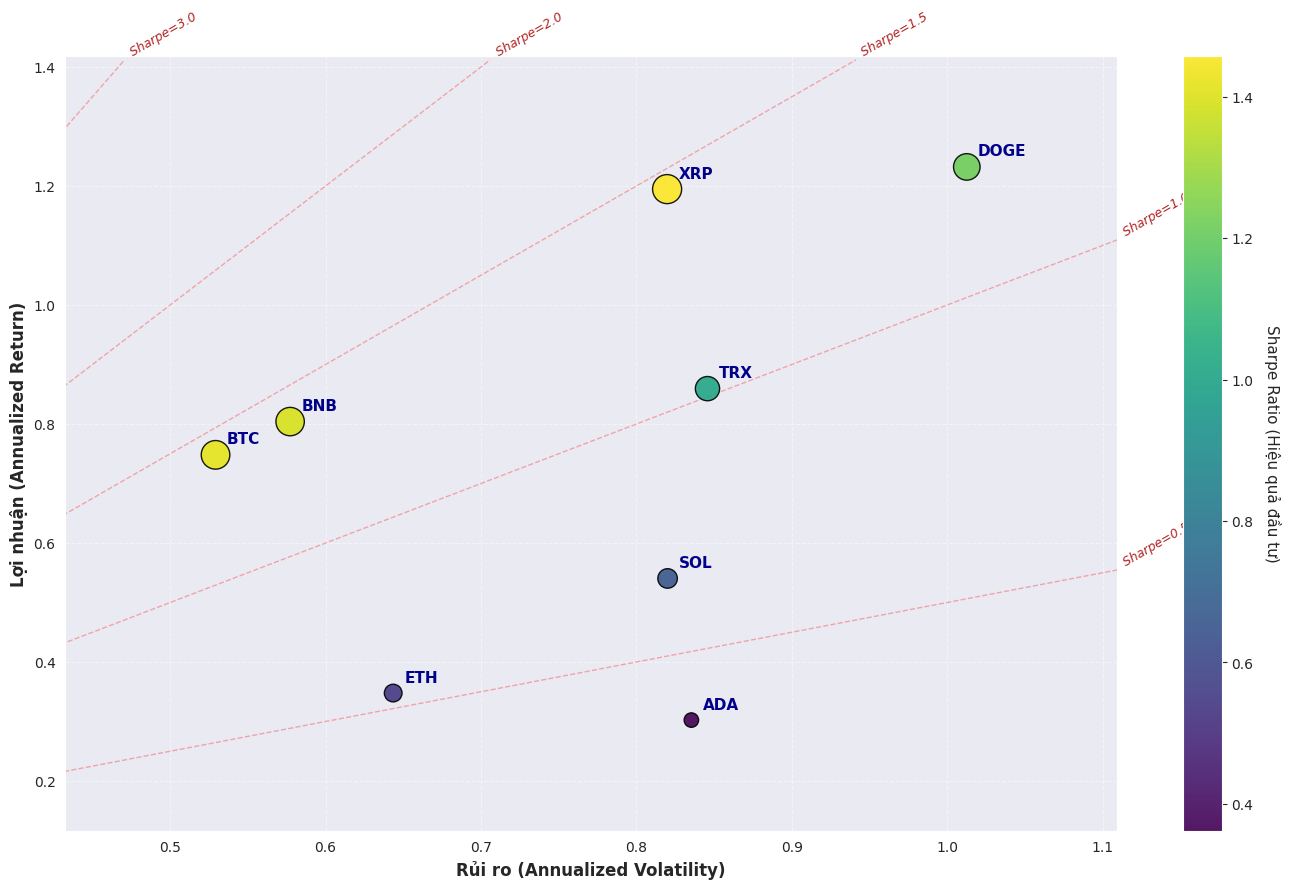

Bảng xếp hạng Sharpe Ratio:


,Sharpe,Returns,Volatility
XRP,1.457440,1.194721,0.819739
BTC,1.413771,0.748135,0.529177
BNB,1.393055,0.804038,0.577176
DOGE,1.216754,1.232053,1.012574
TRX,1.016192,0.859416,0.845722
SOL,0.658980,0.540397,0.820050
ETH,0.540456,0.347775,0.643484
ADA,0.361971,0.302372,0.835347


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- BƯỚC 1: CHUẨN BỊ DỮ LIỆU (Giữ nguyên) ---
analysis_coins = ['BTC', 'ETH', 'BNB', 'XRP', 'ADA', 'SOL', 'DOGE', 'TRX']
# (Đoạn này giả định combined_df đã có sẵn từ các bước trước)
log_returns = np.log(combined_df[analysis_coins] / combined_df[analysis_coins].shift(1)).dropna()

days = 365
annual_returns = log_returns.mean() * days
annual_volatility = log_returns.std() * np.sqrt(days)
sharpe_ratios = annual_returns / annual_volatility

risk_return_df = pd.DataFrame({
    'Returns': annual_returns,
    'Volatility': annual_volatility,
    'Sharpe': sharpe_ratios
})

# --- BƯỚC 2: VẼ BIỂU ĐỒ SCATTER (ĐÃ SỬA LỖI HIỂN THỊ) ---
plt.figure(figsize=(14, 9)) # Tăng chiều cao một chút cho thoáng

# 1. Tính toán giới hạn trục thông minh (Dynamic Limits)
# Lấy min/max của dữ liệu
v_min, v_max = risk_return_df['Volatility'].min(), risk_return_df['Volatility'].max()
r_min, r_max = risk_return_df['Returns'].min(), risk_return_df['Returns'].max()

# Tạo khoảng đệm (buffer) 15% để hình không bị sát lề
x_buffer = (v_max - v_min) * 0.2
y_buffer = (r_max - r_min) * 0.2

# Xác định giới hạn view
xlim_view = [v_min - x_buffer, v_max + x_buffer]
ylim_view = [r_min - y_buffer, r_max + y_buffer]

# 2. Vẽ điểm tản xạ
scatter = plt.scatter(risk_return_df['Volatility'], risk_return_df['Returns'],
                      c=risk_return_df['Sharpe'], cmap='viridis',
                      s=risk_return_df['Sharpe']*300, # Phóng to điểm hơn chút
                      edgecolors='black', alpha=0.9, zorder=3)

# 3. Thêm thanh màu
cbar = plt.colorbar(scatter)
cbar.set_label('Sharpe Ratio (Hiệu quả đầu tư)', rotation=270, labelpad=20, fontsize=11)

# 4. Thêm nhãn tên Coin (Tự động tránh đè nhau nếu có thể - cơ bản)
for i, txt in enumerate(risk_return_df.index):
    # Dùng annotate với mũi tên để tránh che điểm nếu cần, hoặc để offset
    plt.annotate(txt,
                 (risk_return_df['Volatility'].iloc[i], risk_return_df['Returns'].iloc[i]),
                 xytext=(8, 8), textcoords='offset points',
                 fontsize=11, fontweight='bold', color='darkblue')

# 5. Vẽ đường Iso-Sharpe (Chỉ vẽ trong vùng nhìn thấy)
# Tạo x từ 0 đến giới hạn phải của view
x_vals = np.linspace(0, xlim_view[1], 100)

sharpe_levels = [0.5, 1.0, 1.5, 2.0, 3.0]
for s in sharpe_levels:
    y_vals = s * x_vals
    # Chỉ vẽ đường nằm trong giới hạn Y của view để không bị thừa nét
    mask = (y_vals >= ylim_view[0]) & (y_vals <= ylim_view[1])

    if np.any(mask): # Nếu đường có xuất hiện trong view
        plt.plot(x_vals[mask], y_vals[mask], 'r--', alpha=0.3, linewidth=1, zorder=1)

        # Đặt nhãn Sharpe khéo léo ở ngay sát lề phải hoặc lề trên của vùng view
        # Tìm điểm cuối cùng nằm trong view
        last_idx = np.where(mask)[0][-1]
        label_x = x_vals[last_idx]
        label_y = y_vals[last_idx]

        plt.text(label_x, label_y, f' Sharpe={s}',
                 color='firebrick', fontsize=9, fontstyle='italic',
                 verticalalignment='bottom', rotation=30)

# --- THIẾT LẬP HIỂN THỊ ---
plt.xlabel('Rủi ro (Annualized Volatility)', fontsize=12, fontweight='bold')
plt.ylabel('Lợi nhuận (Annualized Return)', fontsize=12, fontweight='bold')

plt.xlim(xlim_view)
plt.ylim(ylim_view)
plt.grid(True, linestyle='--', alpha=0.5, zorder=0)

plt.tight_layout()
plt.show()

print("Bảng xếp hạng Sharpe Ratio:")
display(risk_return_df.sort_values(by='Sharpe', ascending=False)[['Sharpe', 'Returns', 'Volatility']])

- Sharpe > 1: Tốt. Lợi nhuận sinh ra xứng đáng với rủi ro bỏ ra. (Ví dụ: Bạn chịu rủi ro trung bình nhưng lãi khá).

- Sharpe > 2: Rất tốt. Khoản đầu tư cực kỳ hiệu quả.

- Sharpe > 3: Xuất sắc. (Hiếm gặp trong dài hạn).

- Sharpe < 1 (hoặc Âm): Tệ. Bạn đang chịu quá nhiều rủi ro để đổi lấy một mức lợi nhuận còm cõi (hoặc lỗ).

1. "Ông vua hiệu quả" (Efficiency Kings): BTC & BNB

Vị trí: Nằm ở góc bên trái (Rủi ro thấp nhất, trục X khoảng 0.5 - 0.6) nhưng vẫn giữ được mức lợi nhuận khá tốt (trục Y > 0.7).

Nhận xét:

- BTC: Chứng minh vị thế "vàng kỹ thuật số". Rủi ro thấp nhất thị trường nhưng lợi nhuận vẫn cao hơn ETH và SOL. Đây là nền móng bắt buộc phải có của mọi danh mục đầu tư.

- BNB: Cực kỳ ấn tượng. Dù là Altcoin nhưng độ biến động (Volatility) thấp ngang ngửa BTC, trong khi lợi nhuận lại nhỉnh hơn một chút. Đây là tài sản phòng thủ (Defensive Asset) tốt nhất.


2. "Cỗ máy in tiền" (High Alpha): DOGE & XRP

Vị trí: Nằm tít trên cao (Lợi nhuận > 1.2, tức là lãi trung bình năm rất khủng khiếp).


Nhận xét:

- DOGE: Đây là "ngôi sao" của biểu đồ. Dù rủi ro cao nhất (nằm tít bên phải, Volatility > 1.0), nhưng lợi nhuận nó mang lại hoàn toàn xứng đáng với rủi ro đó. Nó nằm trên đường Sharpe=1.0, chứng tỏ đây không phải tăng giá ảo mà là tăng trưởng có lực đẩy mạnh.

- XRP: Một bất ngờ lớn. Lợi nhuận gần bằng DOGE nhưng rủi ro thấp hơn đáng kể (nằm lệch về bên trái hơn). Điều này giúp XRP có chỉ số Sharpe rất đẹp (màu vàng).


3. "Nỗi thất vọng lớn" (Underperformers): ETH & ADA

Vị trí: Nằm sát đáy biểu đồ (Lợi nhuận thấp).

Nhận xét:

- ETH (Quan trọng): Đây là insight đau đớn nhất. ETH nằm ở vị trí rất tệ: Rủi ro cao hơn BTC (nằm bên phải BTC) nhưng Lợi nhuận lại thấp hơn hẳn (chỉ bằng 1/2 BTC).

Kết luận: Trong khung thời gian phân tích này, nắm giữ ETH là kém hiệu quả. Bạn chịu nhiều đau tim hơn holder BTC nhưng lại nghèo hơn họ.

ADA: Tệ nhất bảng. Rủi ro ngang ngửa SOL nhưng lợi nhuận thì thấp nhất (chạm đáy). Nó nằm dưới đường Sharpe=0.5. Nghĩa là rủi ro bỏ ra không được đền đáp xứng đáng.


4. Nhóm "Trung bình" (Mediocre): SOL & TRX

SOL: Nằm ở vùng giữa (Màu xanh dương). Lợi nhuận ở mức trung bình khá nhưng rủi ro lại cao. So với DOGE (cùng mức rủi ro) thì SOL sinh lời kém hơn nhiều.

TRX: Nằm lơ lửng ở giữa. Không quá rủi ro, không quá lợi nhuận. Một lựa chọn trung tính.

**TỔNG KẾT CHIẾN LƯỢC PHÂN BỔ VỐN**
Dựa trên biểu đồ này,có thể tái cơ cấu danh mục như sau:

Tăng tỷ trọng:

BTC: Để làm trụ cột an toàn.

DOGE / XRP: Để "gánh team" phần lợi nhuận (Alpha), vì hiệu suất sinh lời của chúng đang rất tốt.

Giảm tỷ trọng hoặc Cân nhắc bán:

ETH: Cần xem xét lại. Tại sao phải giữ một tài sản rủi ro hơn BTC mà lãi ít hơn? Có thể chuyển bớt vốn từ ETH sang BTC hoặc SOL/DOGE.

ADA: Cắt lỗ hoặc giảm tỷ trọng tối đa vì hiệu quả sử dụng vốn quá thấp.

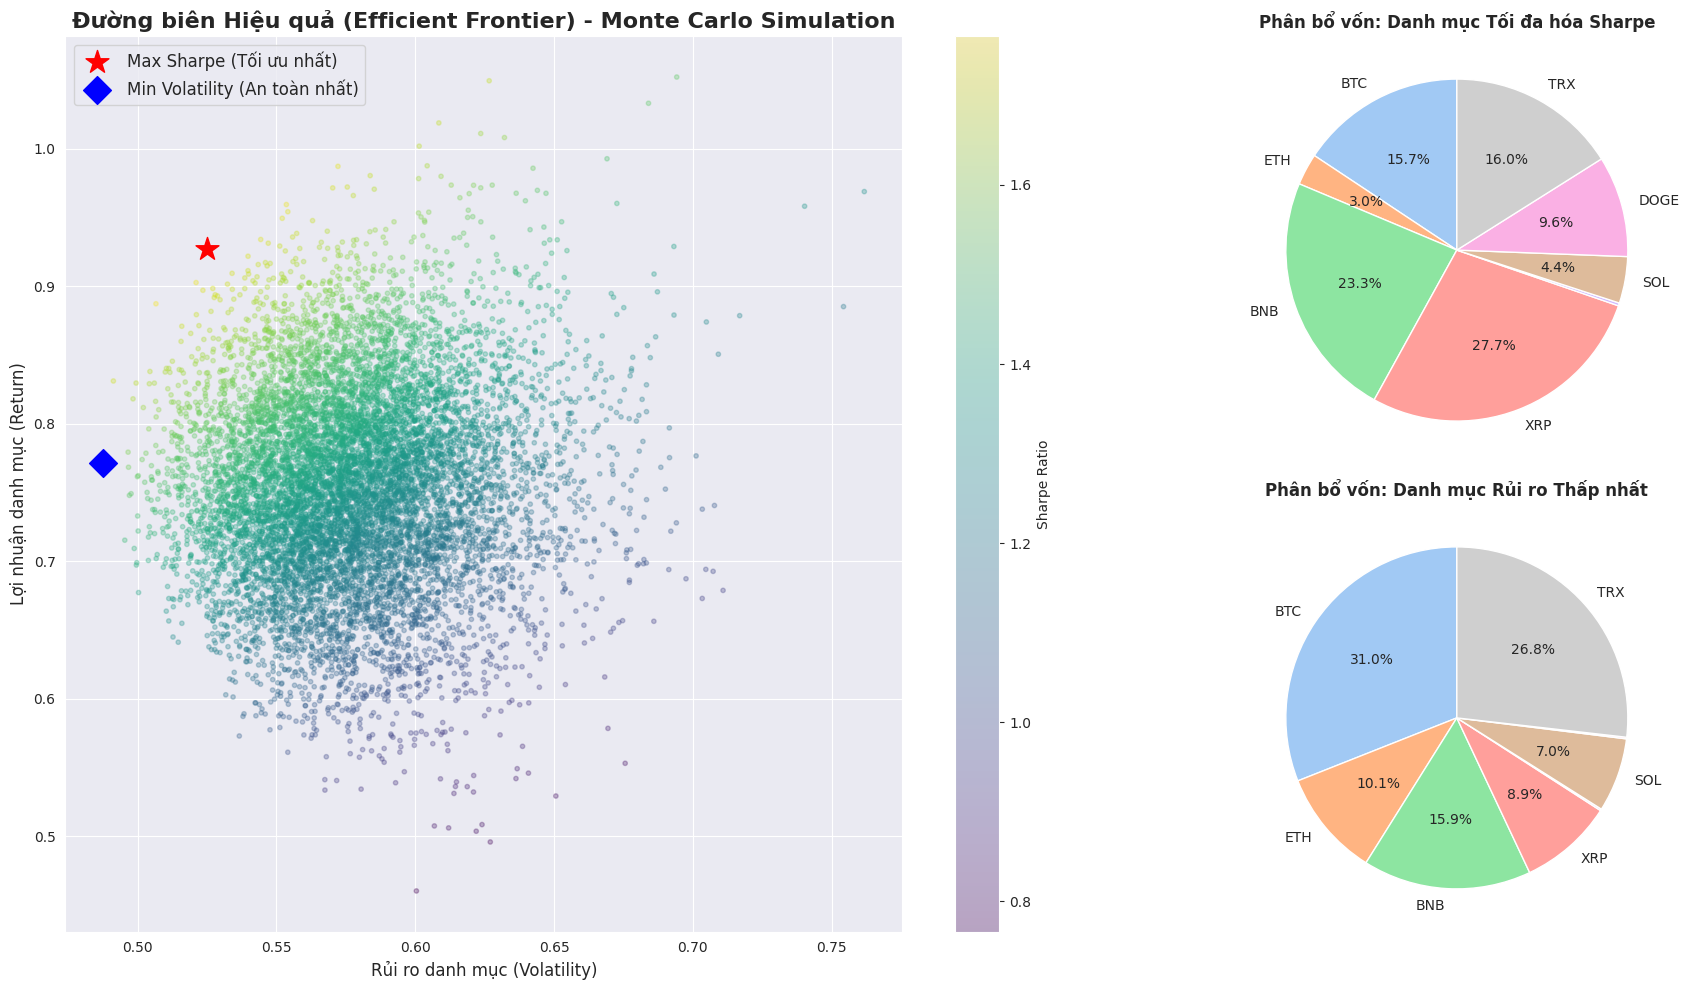

--------------------------------------------------
DANH MỤC TỐI ƯU NHẤT (MAX SHARPE):
Lợi nhuận kỳ vọng: 92.68% | Rủi ro: 52.48% | Sharpe: 1.77
Tỷ trọng phân bổ:
  - BTC: 15.68%
  - ETH: 2.99%
  - BNB: 23.31%
  - XRP: 27.74%
  - ADA: 0.27%
  - SOL: 4.41%
  - DOGE: 9.56%
  - TRX: 16.05%
--------------------------------------------------
DANH MỤC AN TOÀN NHẤT (MIN VOLATILITY):
Lợi nhuận kỳ vọng: 77.16% | Rủi ro: 48.77% | Sharpe: 1.58
Tỷ trọng phân bổ:
  - BTC: 31.00%
  - ETH: 10.09%
  - BNB: 15.92%
  - XRP: 8.88%
  - ADA: 0.16%
  - SOL: 7.00%
  - DOGE: 0.15%
  - TRX: 26.81%
--------------------------------------------------


In [ ]:
# --- BƯỚC 1: MÔ PHỎNG MONTE CARLO (10.000 DANH MỤC) ---
np.random.seed(42) # Để kết quả có thể tái lập
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(analysis_coins)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

# Ma trận hiệp phương sai quy năm
cov_matrix = log_returns.cov() * 365

for i in range(num_portfolios):
    # Tạo trọng số ngẫu nhiên
    weights = np.array(np.random.random(len(analysis_coins)))
    weights = weights / np.sum(weights) # Chuẩn hóa để tổng = 1 (100%)
    all_weights[i,:] = weights

    # Tính lợi nhuận và rủi ro danh mục
    ret_arr[i] = np.sum((log_returns.mean() * weights) * 365)
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

# --- BƯỚC 2: TÌM DANH MỤC TỐI ƯU ---
# 1. Danh mục Max Sharpe (Lợi nhuận/Rủi ro tốt nhất)
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_ret = ret_arr[max_sharpe_idx]
max_sharpe_vol = vol_arr[max_sharpe_idx]
max_sharpe_weights = all_weights[max_sharpe_idx]

# 2. Danh mục Min Volatility (An toàn nhất)
min_vol_idx = vol_arr.argmin()
min_vol_ret = ret_arr[min_vol_idx]
min_vol_vol = vol_arr[min_vol_idx]
min_vol_weights = all_weights[min_vol_idx]

# --- BƯỚC 3: VẼ BIỂU ĐỒ EFFICIENT FRONTIER ---
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 2) # Layout lưới phức tạp: 1 biểu đồ lớn bên trái, 2 biểu đồ tròn bên phải

# >> Biểu đồ chính: Efficient Frontier (Bên trái)
ax_main = fig.add_subplot(gs[:, 0])
sc = ax_main.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', alpha=0.3, s=10)
cbar = plt.colorbar(sc, ax=ax_main)
cbar.set_label('Sharpe Ratio')

# Đánh dấu 2 điểm tối ưu
ax_main.scatter(max_sharpe_vol, max_sharpe_ret, c='red', s=300, marker='*', label='Max Sharpe (Tối ưu nhất)')
ax_main.scatter(min_vol_vol, min_vol_ret, c='blue', s=200, marker='D', label='Min Volatility (An toàn nhất)')

ax_main.set_title('Đường biên Hiệu quả (Efficient Frontier) - Monte Carlo Simulation', fontsize=16, fontweight='bold')
ax_main.set_xlabel('Rủi ro danh mục (Volatility)', fontsize=12)
ax_main.set_ylabel('Lợi nhuận danh mục (Return)', fontsize=12)
ax_main.legend(loc='upper left', fontsize=12)

# >> Biểu đồ phụ 1: Tỷ trọng Max Sharpe (Góc trên phải)
ax_pie1 = fig.add_subplot(gs[0, 1])
# Lọc ra các coin có tỷ trọng > 1% để vẽ cho đẹp (bỏ các coin vụn vặt)
labels_max = [analysis_coins[i] if max_sharpe_weights[i] > 0.01 else '' for i in range(len(analysis_coins))]
ax_pie1.pie(max_sharpe_weights, labels=labels_max, autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',
            startangle=90, colors=sns.color_palette("pastel", len(analysis_coins)))
ax_pie1.set_title('Phân bổ vốn: Danh mục Tối đa hóa Sharpe', fontweight='bold')

# >> Biểu đồ phụ 2: Tỷ trọng Min Volatility (Góc dưới phải)
ax_pie2 = fig.add_subplot(gs[1, 1])
labels_min = [analysis_coins[i] if min_vol_weights[i] > 0.01 else '' for i in range(len(analysis_coins))]
ax_pie2.pie(min_vol_weights, labels=labels_min, autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',
            startangle=90, colors=sns.color_palette("pastel", len(analysis_coins)))
ax_pie2.set_title('Phân bổ vốn: Danh mục Rủi ro Thấp nhất', fontweight='bold')

plt.tight_layout()
plt.show()

# --- XUẤT KẾT QUẢ RA TEXT ---
print("-" * 50)
print("DANH MỤC TỐI ƯU NHẤT (MAX SHARPE):")
print(f"Lợi nhuận kỳ vọng: {max_sharpe_ret*100:.2f}% | Rủi ro: {max_sharpe_vol*100:.2f}% | Sharpe: {sharpe_arr[max_sharpe_idx]:.2f}")
print("Tỷ trọng phân bổ:")
for i, coin in enumerate(analysis_coins):
    if max_sharpe_weights[i] > 0.001: print(f"  - {coin}: {max_sharpe_weights[i]*100:.2f}%")

print("-" * 50)
print("DANH MỤC AN TOÀN NHẤT (MIN VOLATILITY):")
print(f"Lợi nhuận kỳ vọng: {min_vol_ret*100:.2f}% | Rủi ro: {min_vol_vol*100:.2f}% | Sharpe: {sharpe_arr[min_vol_idx]:.2f}")
print("Tỷ trọng phân bổ:")
for i, coin in enumerate(analysis_coins):
    if min_vol_weights[i] > 0.001: print(f"  - {coin}: {min_vol_weights[i]*100:.2f}%")
print("-" * 50)

**Mô phỏng Monte Carlo** là kỹ thuật dùng máy tính tạo ra hàng vạn kịch bản phân bổ vốn ngẫu nhiên (ví dụ: thử chia 10% BTC + 90% ETH, rồi thử 20% BTC + 80% SOL...).

**Lý do áp dụng:** Vì có vô hạn cách chia tiền giữa các coin, con người không thể tính xuể; thuật toán này giúp "quét" nhanh toàn bộ các khả năng có thể xảy ra.

**Ý nghĩa:**

- Nó vẽ ra "Đường biên hiệu quả" (hình cánh cung) – cho biết giới hạn lợi nhuận tối đa bạn có thể đạt được ở mỗi mức rủi ro.

- Nó giúp tìm ra "Tỷ lệ vàng" (Max Sharpe) chính xác để phân bổ vốn sao cho lãi cao nhất mà rủi ro thấp nhất.

- Biến việc đầu tư từ "đoán mò" thành quyết định dựa trên xác suất thống kê đã được kiểm chứng.

**Sau khi chạy xong 10.000 dòng này, đoạn code thực hiện 2 bước tìm kiếm:**

Tìm Max Sharpe (Để vẽ Pie Chart 1):

- Máy tính quét cột "Chỉ số Sharpe".

- Nó tìm thấy con số lớn nhất nằm ở dòng #452.

- Nó lấy Ngôi sao màu đỏ đánh dấu vào vị trí của dòng #452 trên biểu đồ Scatter.

- Đồng thời, nó lấy "Công thức phân bổ" của dòng #452 đó để vẽ ra cái Pie Chart thứ nhất.

Tìm Min Volatility (Để vẽ Pie Chart 2):

- Máy tính quét cột "Rủi ro (Volatility)".

- Nó tìm thấy con số nhỏ nhất nằm ở dòng #8901.

- Nó lấy Hình thoi màu xanh đánh dấu vào vị trí của dòng #8901.

- Nó lấy "Công thức phân bổ" của dòng #8901 đó để vẽ ra cái Pie Chart thứ hai.